In [ ]:
%matplotlib inline

In [1]:
print(__doc__)

# author: Jing Wang jing.julia.wang@gmail.com
# date: April 30th 2019
# function: elastic net
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import scipy.io as sio
from matplotlib.pyplot import savefig
import matplotlib
import pandas as pd

Automatically created module for IPython interactive environment


In [11]:
#author: Jing . jing.wang@mssm.edu
#function: find correlations among genes and cancer types
matrix = np.loadtxt('data_gene_TCGA_LF_v2.txt', usecols=range(301))

In [12]:
matrix.shape

(8643, 301)

In [13]:
gene = matrix[:,0:299]
cancer = matrix[:,299:300]
lf = matrix[:,300]
np.unique(cancer)
cancer

array([[ 8.],
       [ 8.],
       [ 8.],
       ...,
       [14.],
       [ 5.],
       [ 4.]])

In [103]:
fr_matrix = np.genfromtxt('fr_data_gene_TCGA_LF_v2.txt', dtype='str',delimiter='\t')
gene_names = fr_matrix[1:-2] #get gene names by removing symbol, TCGA Study and leukocyte fraction
gene_index_name = {}  # index is the same index in gene
for i in range(0,gene_names.shape[0]):
    gene_index_name[i] = gene_names[i][0]
with open('299_gene_names.txt', 'w') as f:
    for item in gene_names:
        f.write("%s %s\n" % (item[0], item[1]))

In [112]:
i=1
for item in gene_names:
    if i%15 != 0:
        print(item[0], end=' ')
    else:
        print(item[0], end='\n')
    i=i+1    

ABL1 ACVR1 ACVR1B ACVR2A AJUBA AKT1 ALB ALK AMER1 APC APOB AR ARAF ARHGAP35 ARID1A
ARID2 ARID5B ASXL1 ASXL2 ATF7IP ATM ATR ATRX ATXN3 AXIN1 AXIN2 B2M BAP1 BCL2 BCL2L11
BCOR BRAF BRCA1 BRCA2 BRD7 BTG2 CACNA1A CARD11 CASP8 CBFB CBWD3 CCND1 CD70 CD79B CDH1
CDK12 CDK4 CDKN1A CDKN1B CDKN2A CDKN2C CEBPA CHD3 CHD4 CHD8 CHEK2 CIC CNBD1 COL5A1 CREB3L3
CREBBP CSDE1 CTCF CTNNB1 CTNND1 CUL1 CUL3 CYLD CYSLTR2 DACH1 DAZAP1 DDX3X DHX9 DIAPH2 DICER1
DMD DNMT3A EEF1A1 EEF2 EGFR EGR3 EIF1AX ELF3 EP300 EPAS1 EPHA2 EPHA3 ERBB2 ERBB3 ERBB4
ERCC2 ESR1 EZH2 FAM46D FAT1 FBXW7 FGFR1 FGFR2 FGFR3 FLNA FLT3 FOXA1 FOXA2 FOXQ1 FUBP1
GABRA6 GATA3 GNA11 GNA13 GNAQ GNAS GPS2 GRIN2D GTF2I H3F3A H3F3C HGF HIST1H1C HIST1H1E HLA-A
HLA-B HRAS HUWE1 IDH1 IDH2 IL6ST IL7R INPPL1 IRF2 IRF6 JAK1 JAK2 JAK3 KANSL1 KDM5C
KDM6A KEAP1 KEL KIF1A KIT KLF5 KMT2A KMT2B KMT2C KMT2D KRAS KRT222 LATS1 LATS2 LEMD2
LZTR1 MACF1 MAP2K1 MAP2K4 MAP3K1 MAP3K4 MAPK1 MAX MECOM MED12 MEN1 MET MGA MGMT MLH1
MSH2 MSH3 MSH6 MTOR MUC6 MYC MYCN MYD88 MYH

In [113]:
cancer_name = np.loadtxt('TCGA_index.txt', dtype='str',delimiter='\t')
cancer_label_name = {} # the label of cancer type start from 1
for i in range(0, cancer_name.shape[0]):
    cancer_label_name[i+1] = cancer_name[i][1]
#cancer_label_name

In [120]:
i = 1
for item in cancer_name:
    if(i%5!=0):
        print(item[1], end= '\t')
    else:
        print(item[1], end = '\n')
    i=i+1

ACC	BLCA	BRCA	CESC	CHOL
COAD	ESCA	GBM	HNSC	KICH
KIRC	KIRP	LGG	LIHC	LUAD
LUSC	MESO	OV	PAAD	PCPG
PRAD	READ	SARC	SKCM	STAD
TGCT	THCA	UCEC	UCS	UVM


In [16]:
cancer_label_ind = {}
cancer_num_dist = list(range(len(cancer_label_name)))
len(cancer_num_dist)
cancer.shape[0]

8643

In [17]:
for i in range(0, len(cancer_label_name)): 
    out = np.where(cancer==i+1)
    cancer_label_ind[i+1] = out[0]  
    cancer_num_dist[i] = len(out[0])

In [18]:
len(cancer_num_dist)

30

In [19]:
cancer_name=list(cancer_label_name.values())


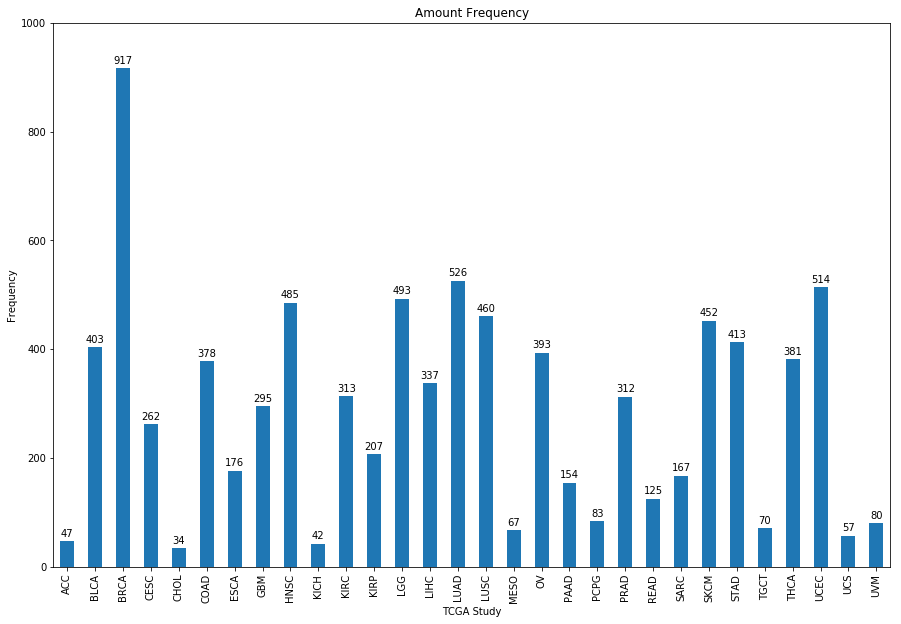

In [20]:
# plot distribution 
freq_series = pd.Series(cancer_num_dist)
x_labels = cancer_name

# Plot the figure.
plt.figure(figsize=(15, 10))
font_size = 22
ax = freq_series.plot(kind='bar')
ax.set_title('Amount Frequency')
ax.set_xlabel('TCGA Study')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)
ax.set_yticks(list(range(0,1100,200)))
rects = ax.patches

# Make some labels.
labels = cancer_num_dist
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
matplotlib.rcParams.update({'font.size': 22 })
#plt.savefig("./Figures/distribute_cancer.pdf",bbox_inches='tight', 
#           transparent=False,pad_inches=0.1)
plt.show()

In [49]:
# linear regression based on gene and L whole dataset
x = np.concatenate((gene, cancer), axis=1)
x = gene
y = lf

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)
enet_regr.fit(x, lf)
coef = np.transpose(enet_regr.coef_)
abs_coef = abs(coef)
abs_sort_list = sorted(range(len(coef)), key=lambda k: abs_coef[k],reverse=True)

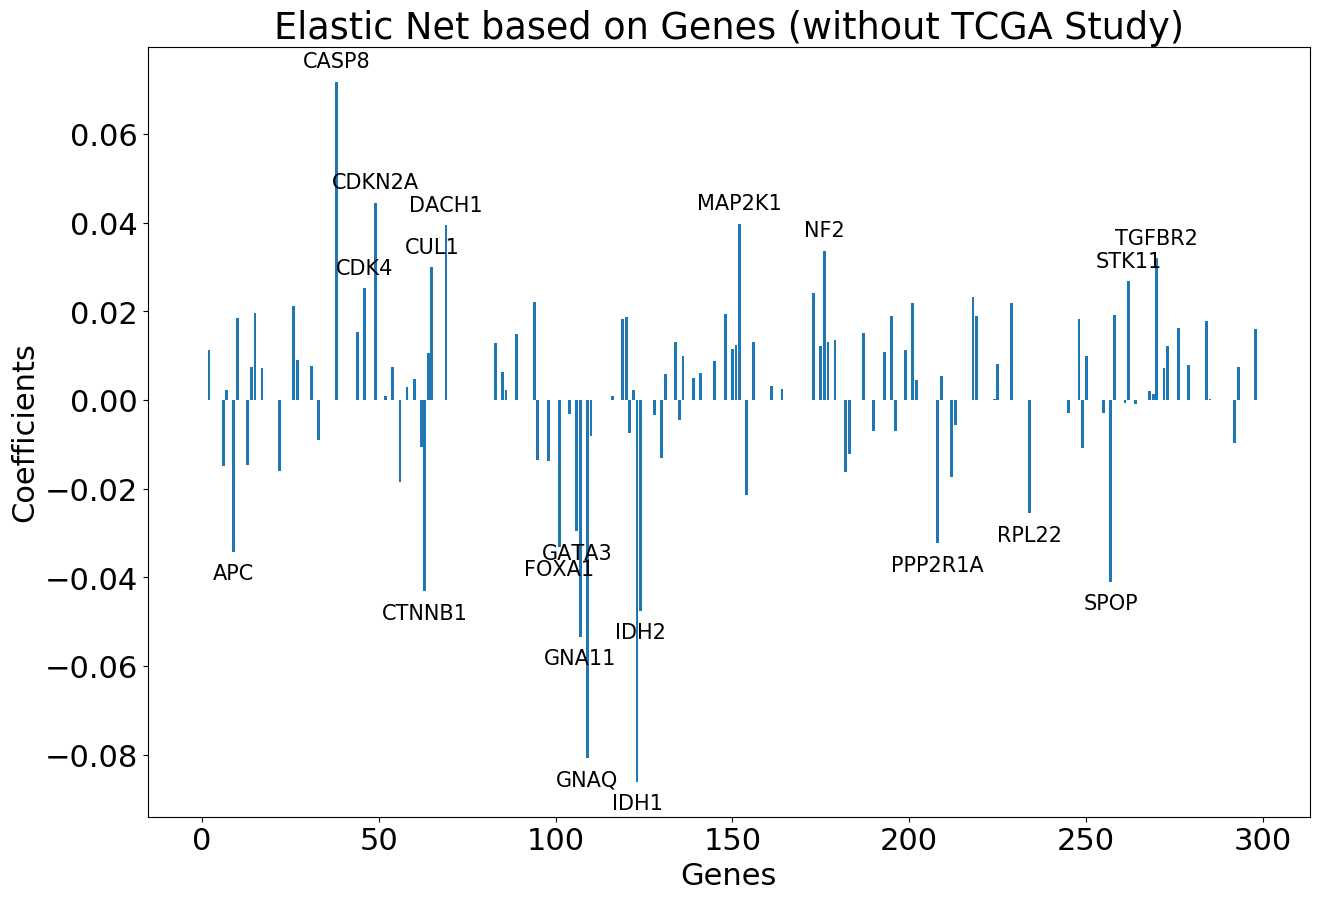

In [66]:
method = "Elastic Net"
plt.figure(figsize=(15, 10))
font_size = 22
x_label = list(range(0,len(coef)))
plt.title(method + " based on Genes (without TCGA Study)")
plt.xlabel('Genes')
plt.ylabel('Coefficients')
plt.bar(x_label, coef)
matplotlib.rcParams.update({'font.size': 22 })
num_features = 20
labels = gene_names[abs_sort_list[0:num_features],0]
k = 0

for x_loc,y_loc in zip([x_label[i] for i in abs_sort_list[0:num_features]], [coef[i] for i in abs_sort_list[0:num_features]]):
    label = labels[k]
    k = k+1
    if (y_loc<0):
        plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15) 
    else:
        plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15) 

plt.savefig("./out/" + method + "/" + method + "_gene_lf.pdf", bbox_inches='tight', 
           transparent = False,pad_inches=0.1)
plt.show()


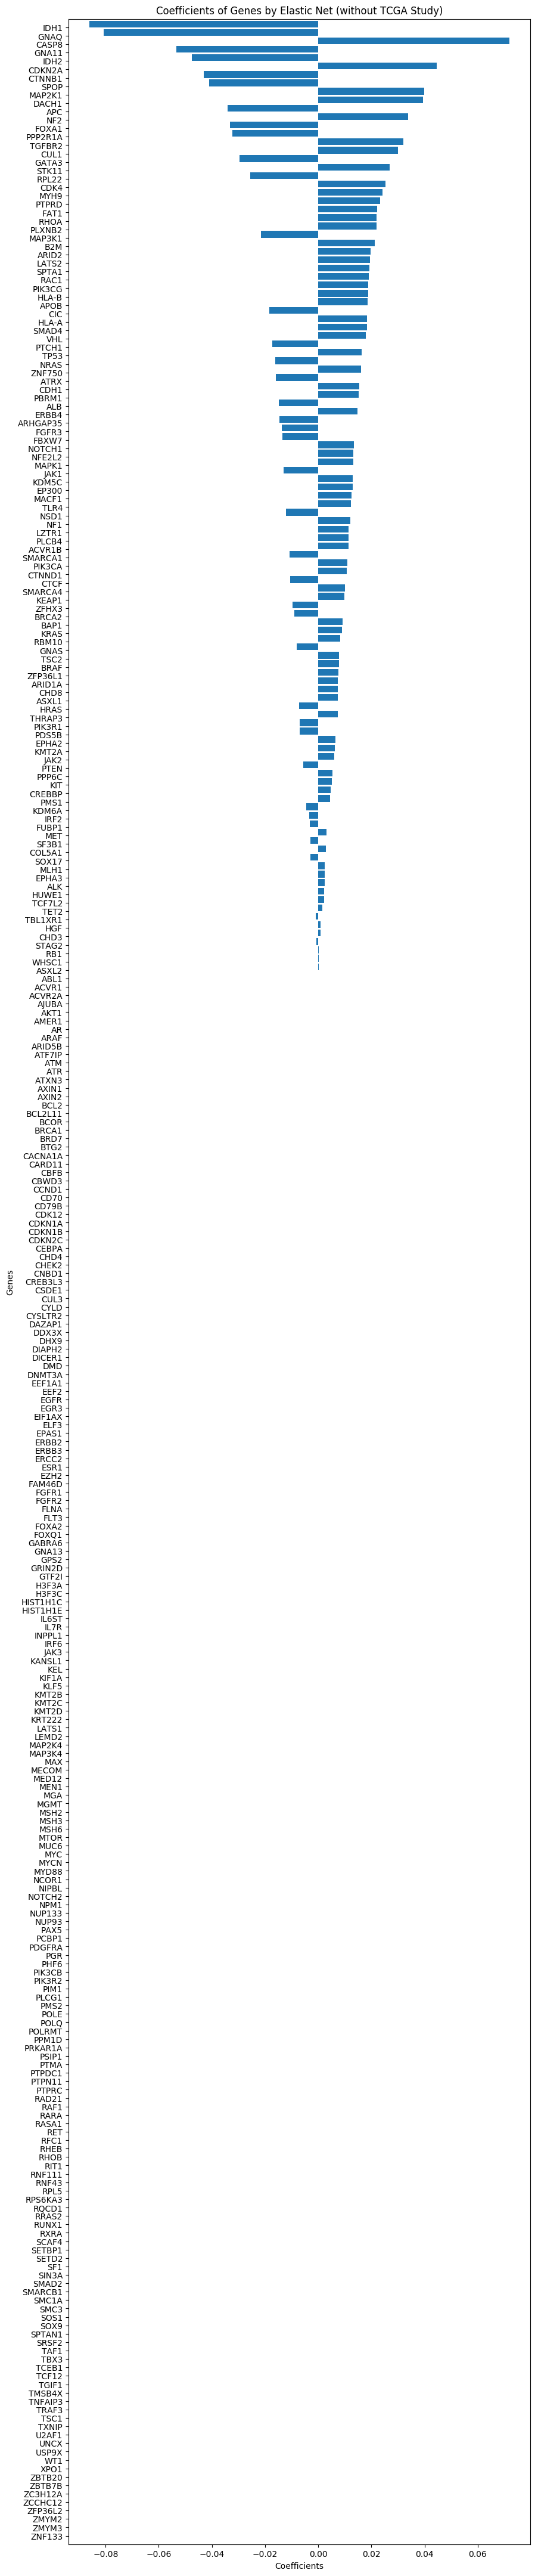

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
reverse_abs_sort_list = abs_sort_list
reverse_abs_sort_list.reverse()

objects = [gene_names[i,0] for i in reverse_abs_sort_list]
y_pos = np.arange(len(objects))
performance = [coef[i] for i in reverse_abs_sort_list]
plt.figure(figsize=(10, 55))

plt.barh(y_pos, performance, align='edge')
plt.yticks(y_pos, objects)
plt.xlabel('Coefficients')
plt.ylabel('Genes')
plt.title("Coefficients of Genes by " + method + " (without TCGA Study)")
plt.ylim(min(y_pos)-1, max(y_pos)+1) #This will reduce the margins to a half-a-bar width.
plt.savefig("./out/"+method+"/" method + "_gene.pdf",bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
plt.show()

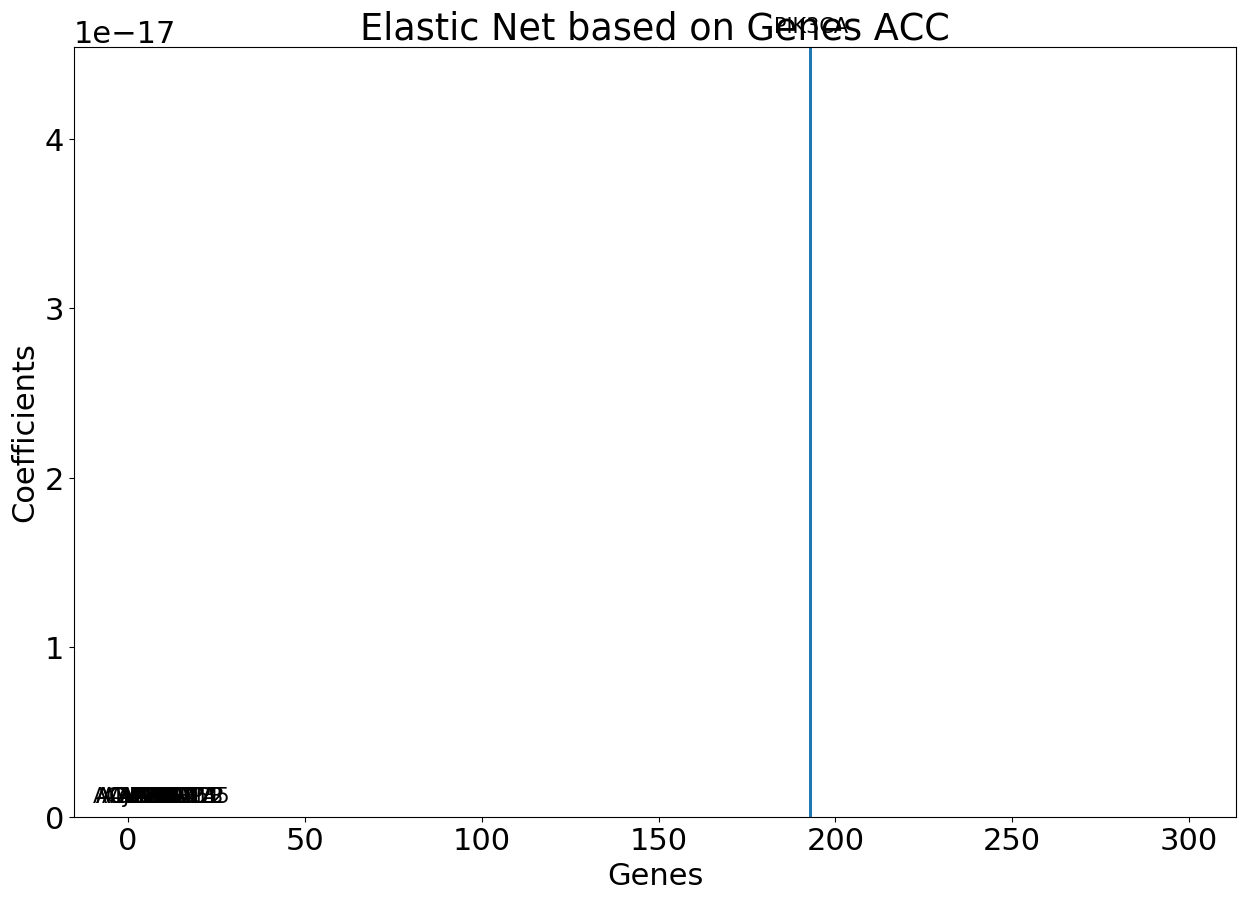

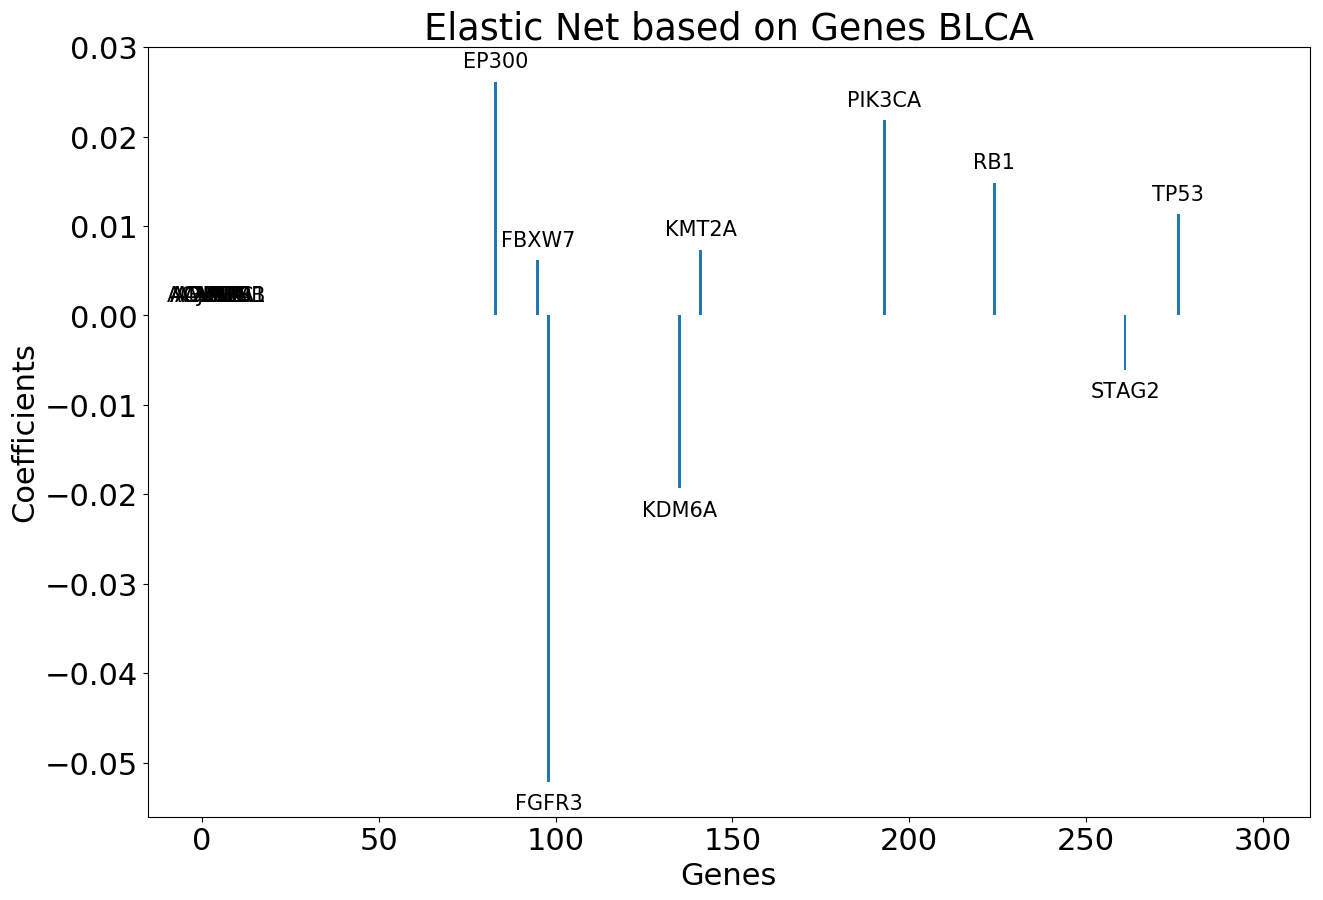

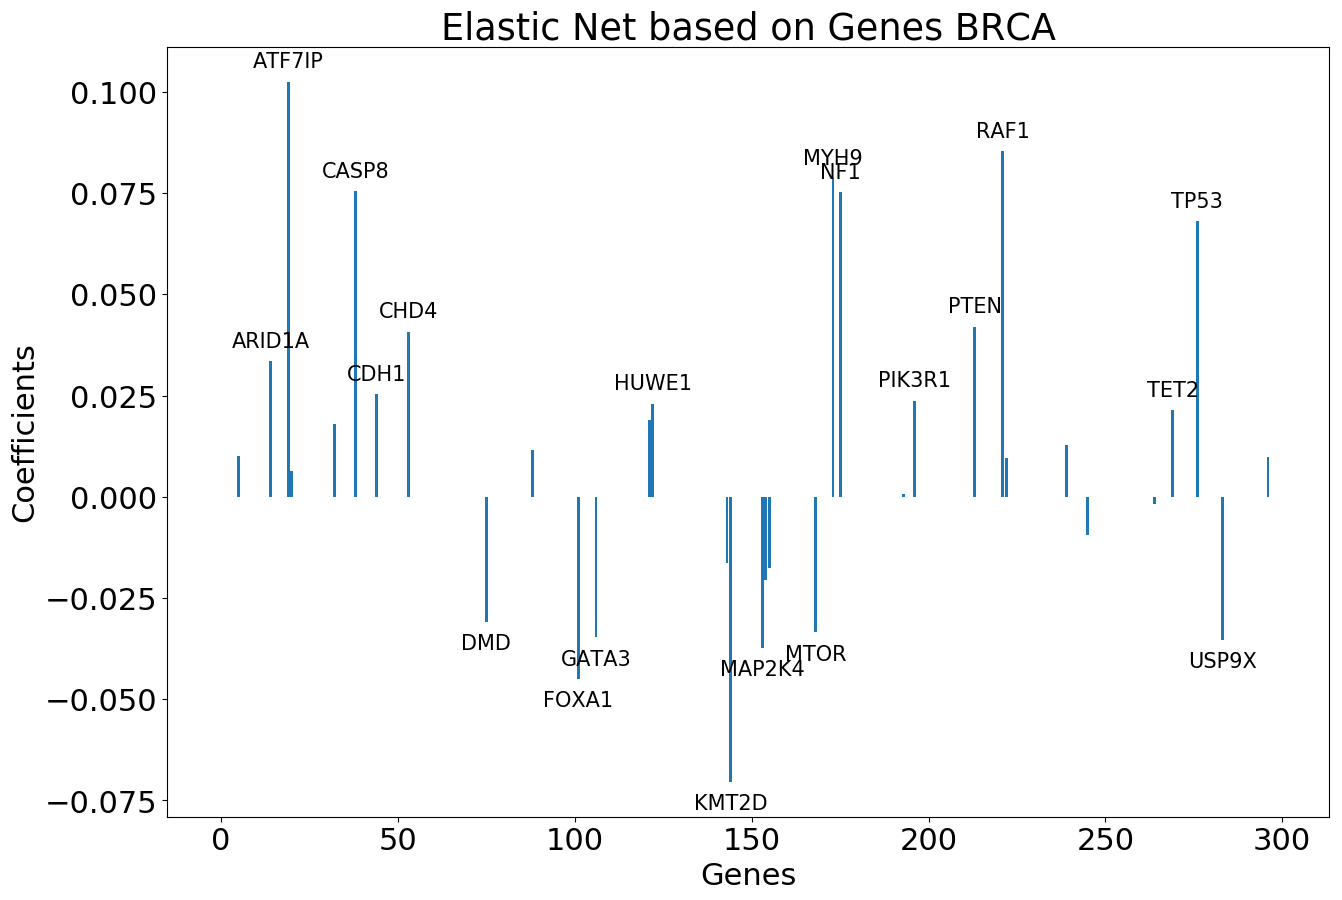

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


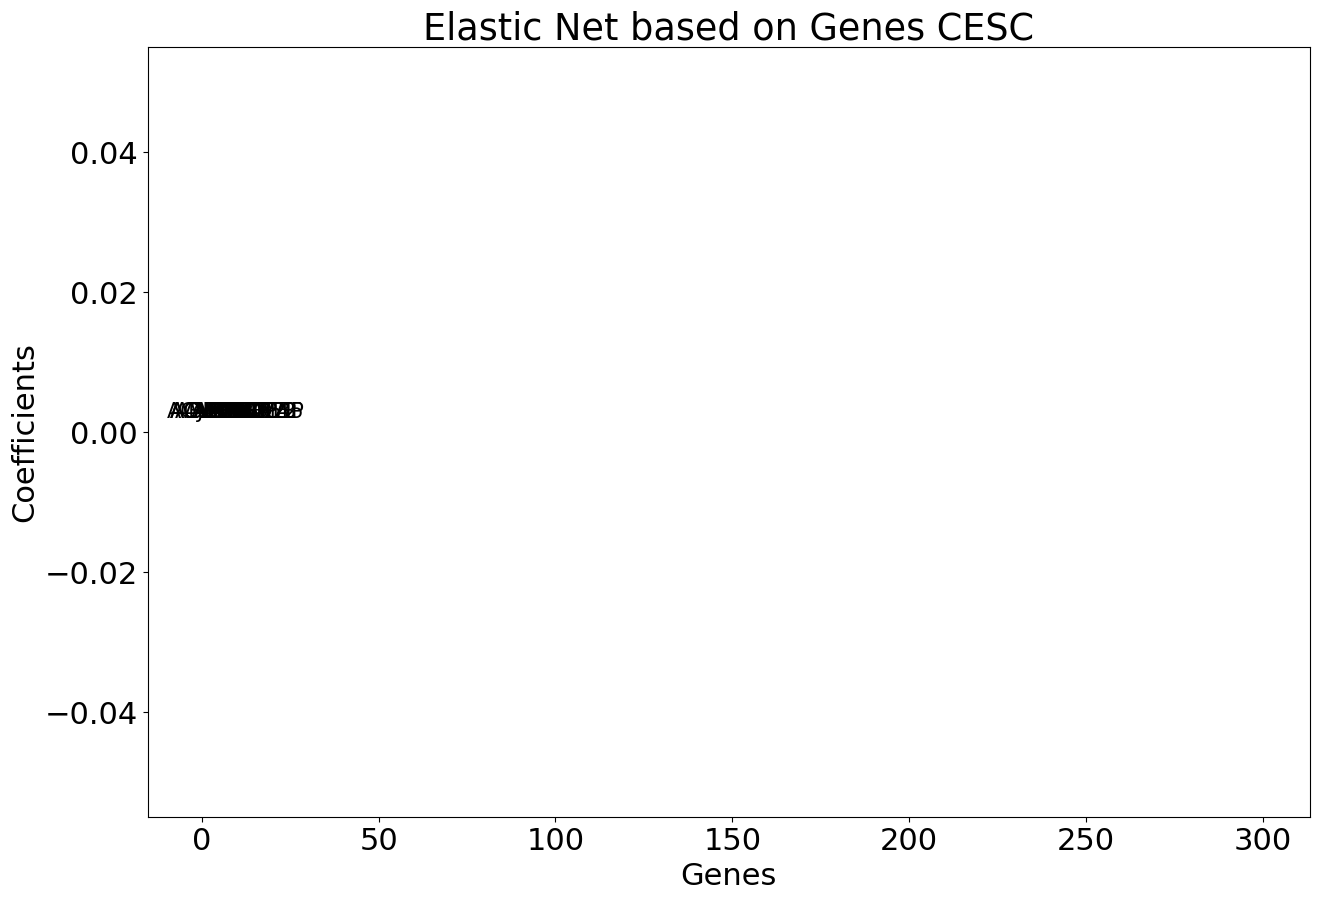

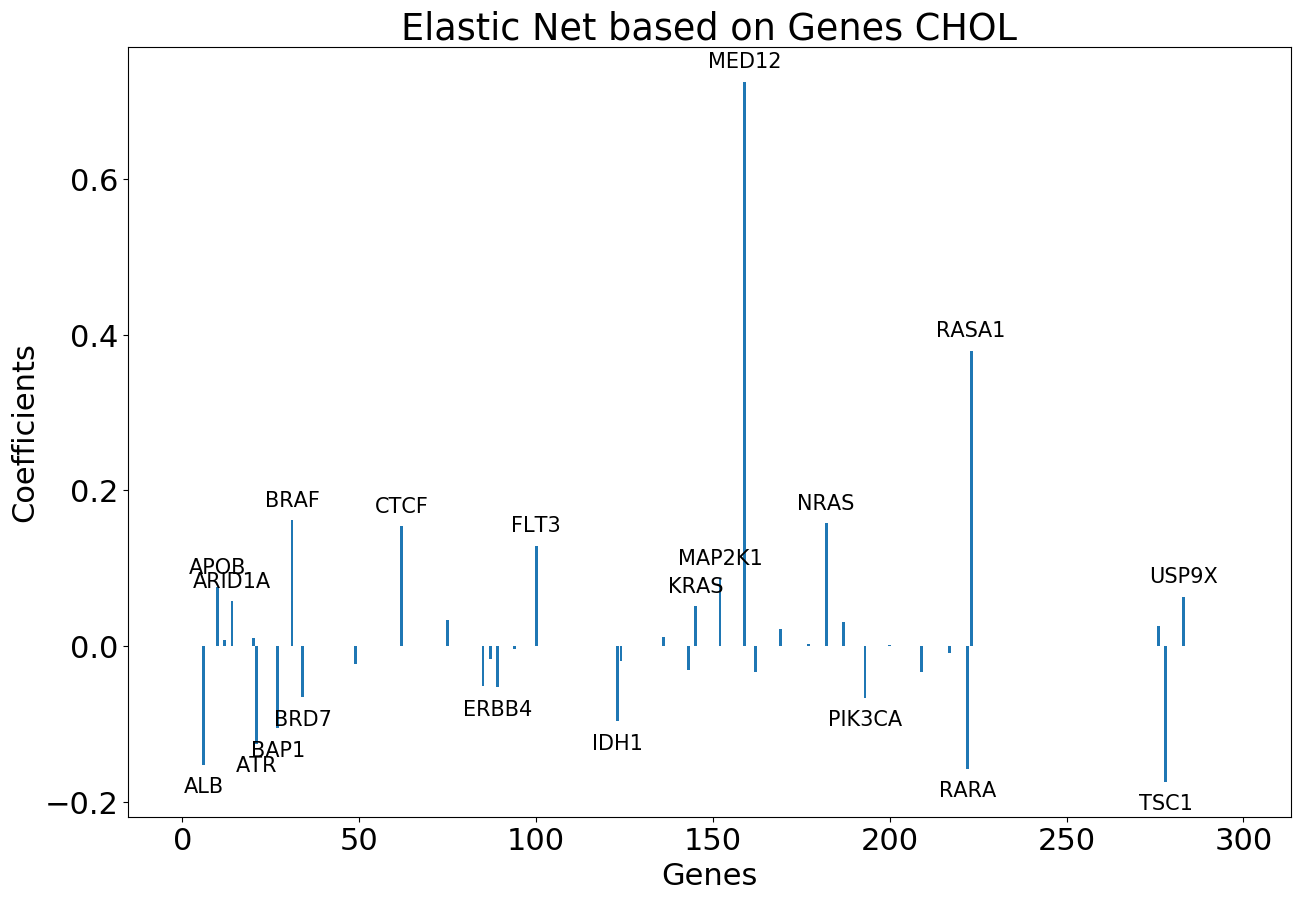

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


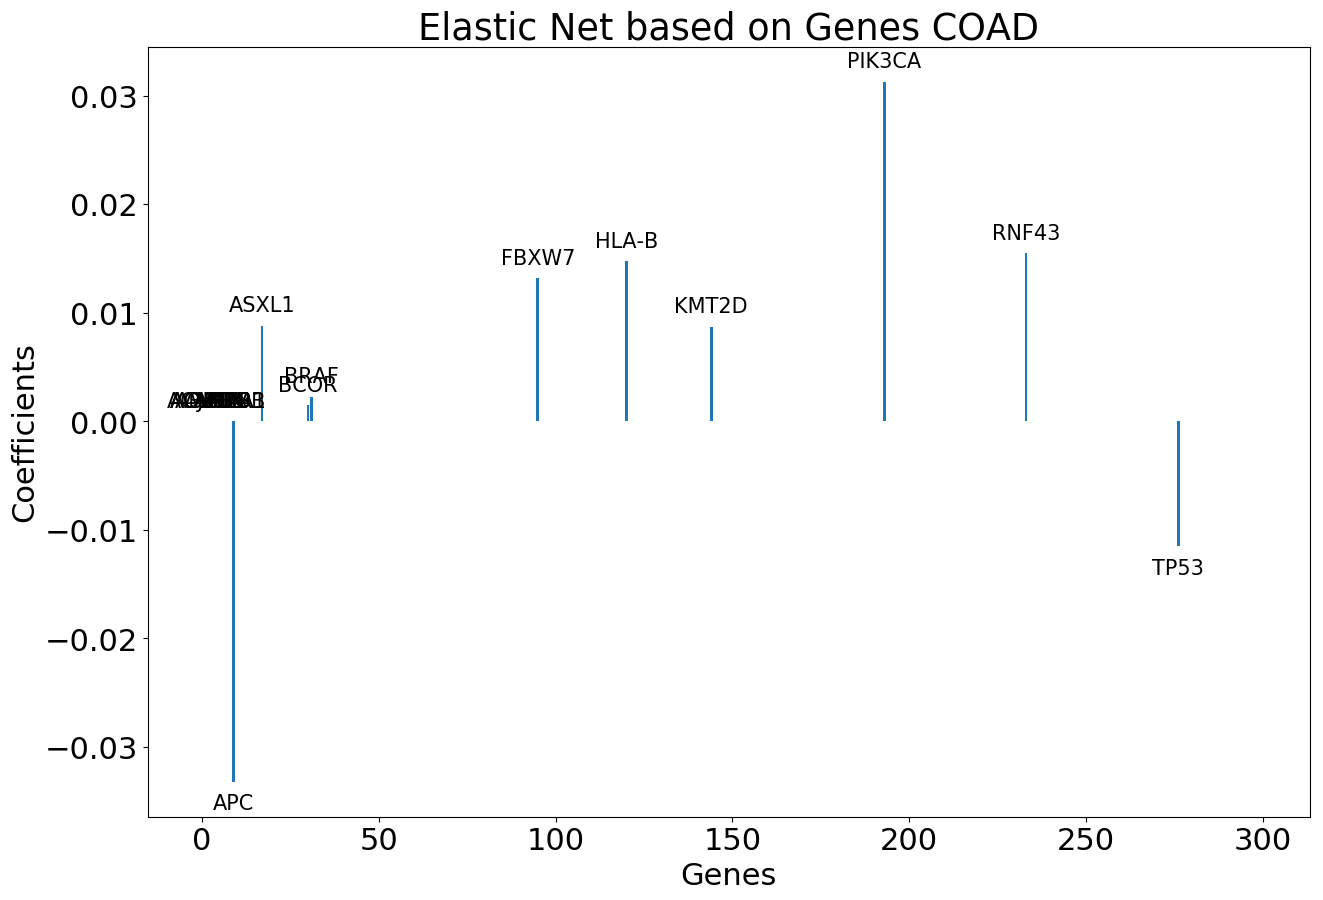

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

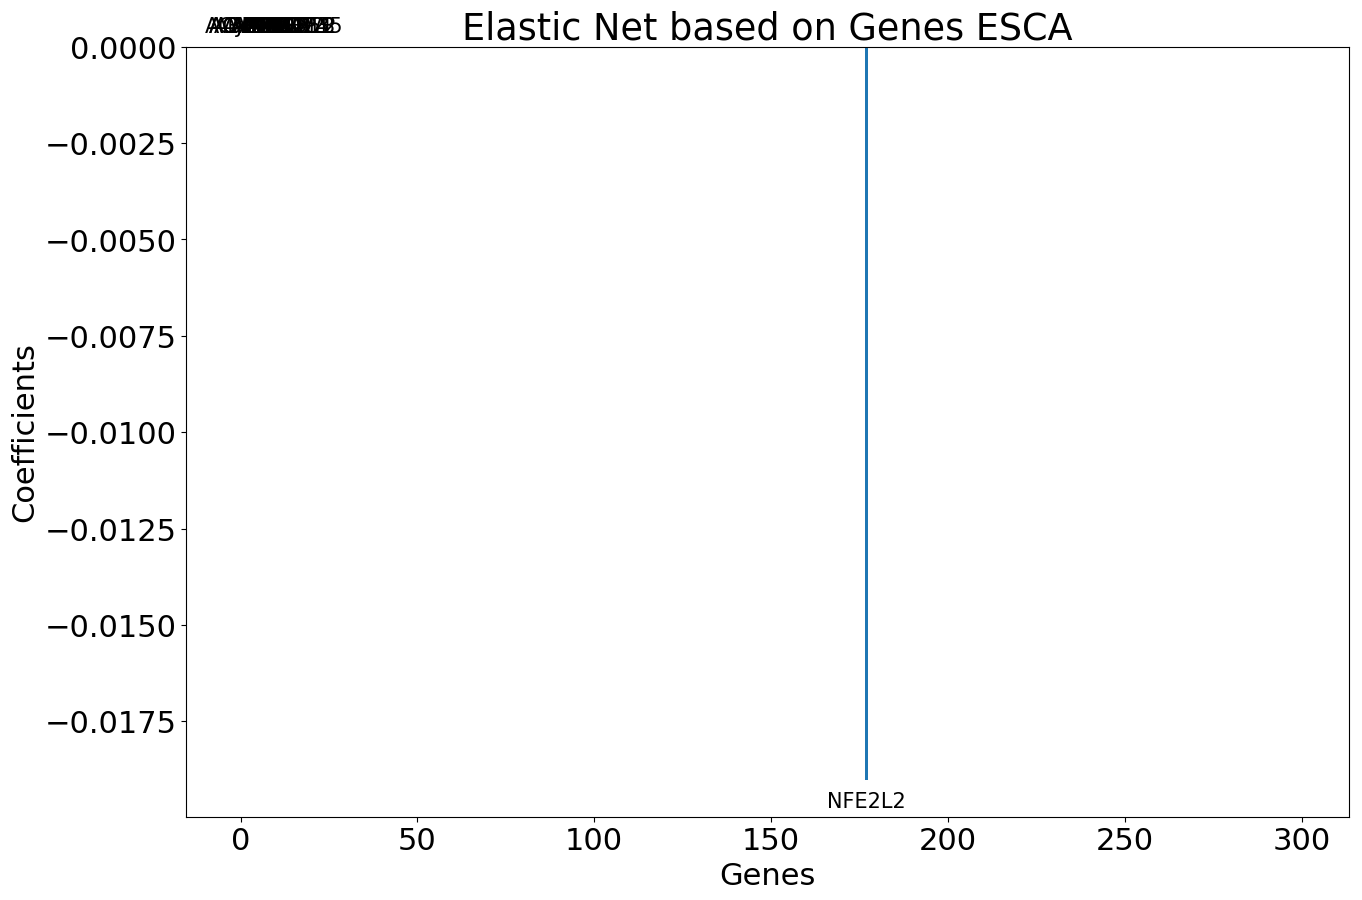

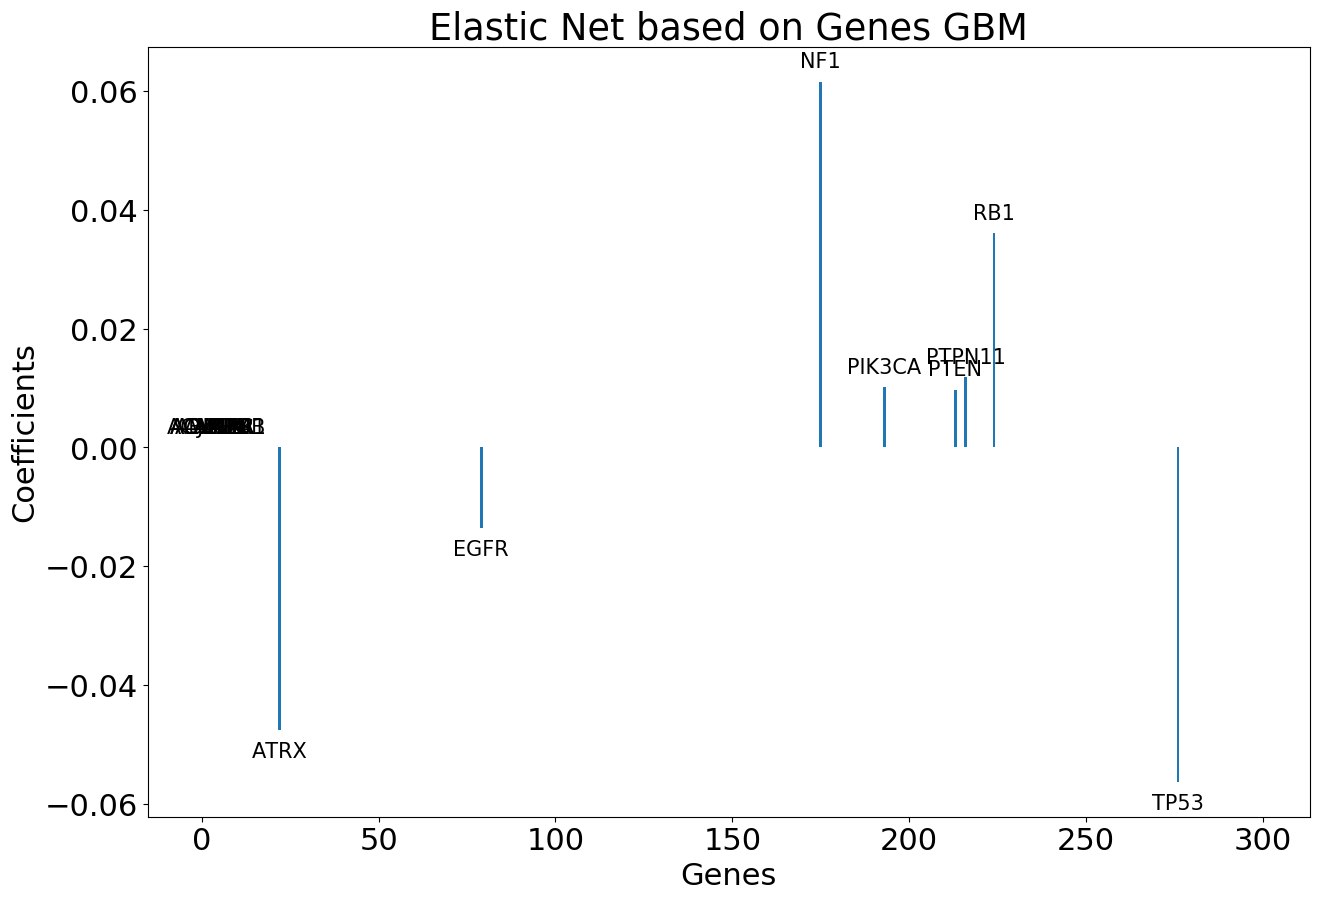

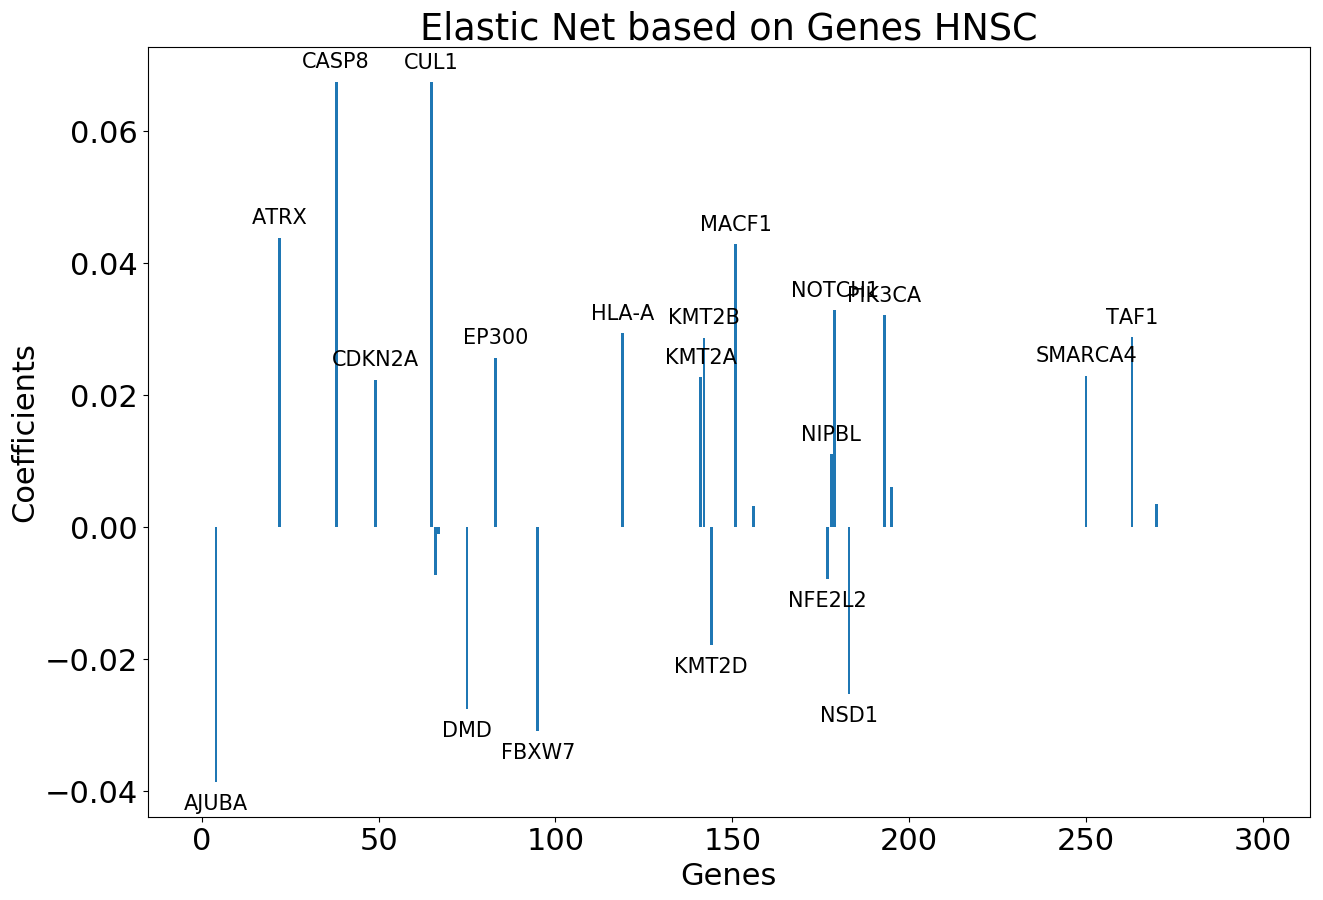

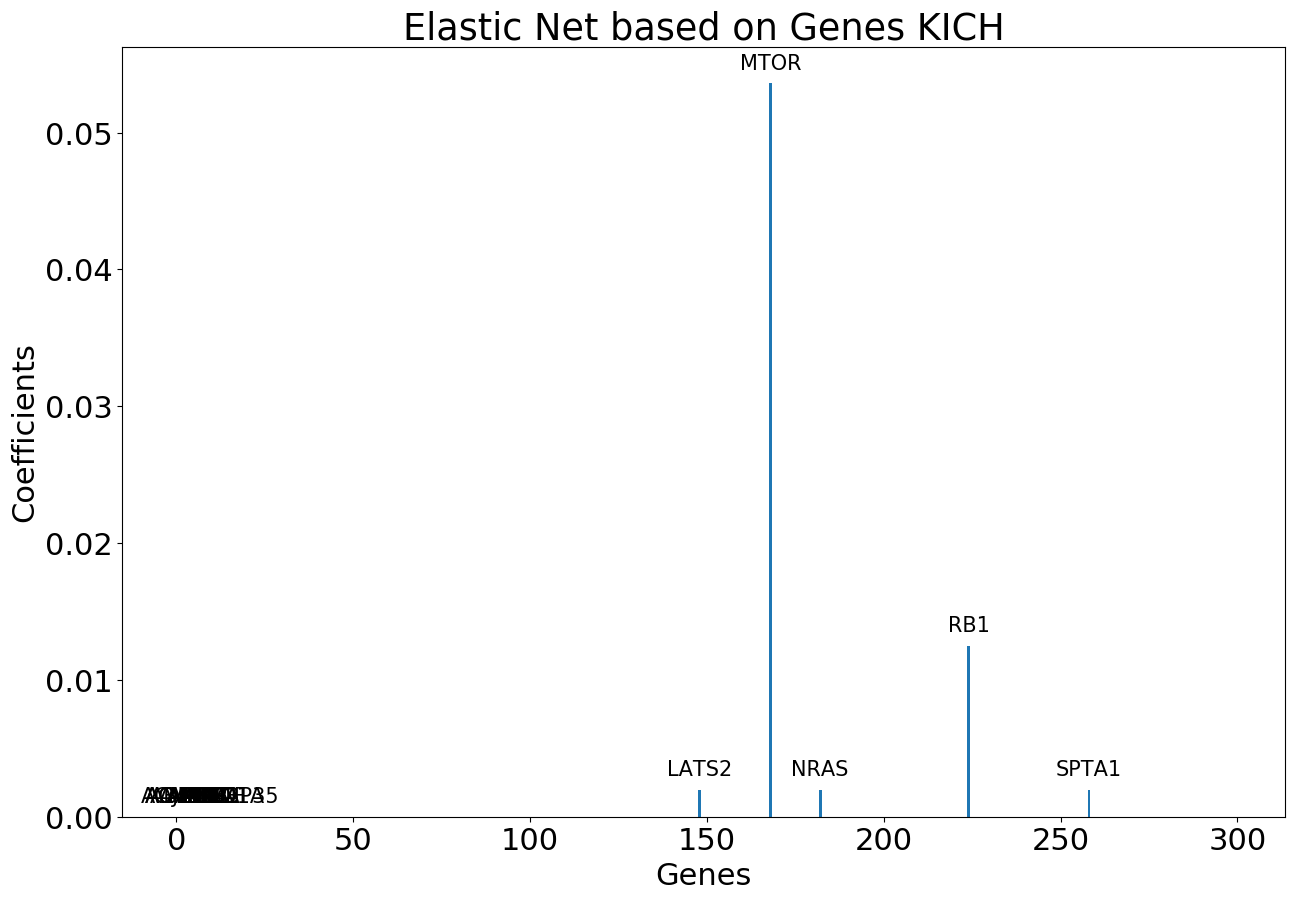

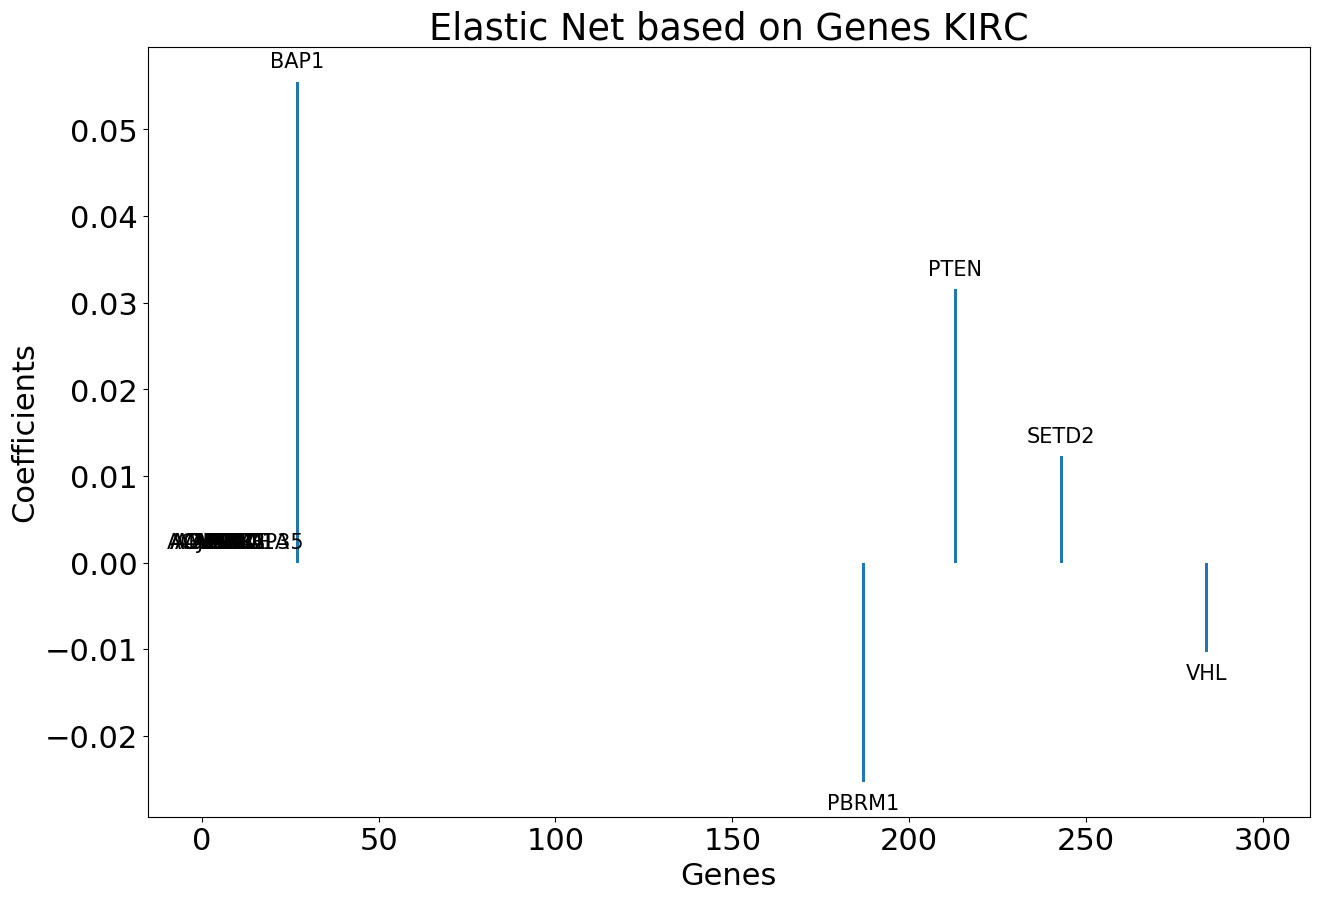

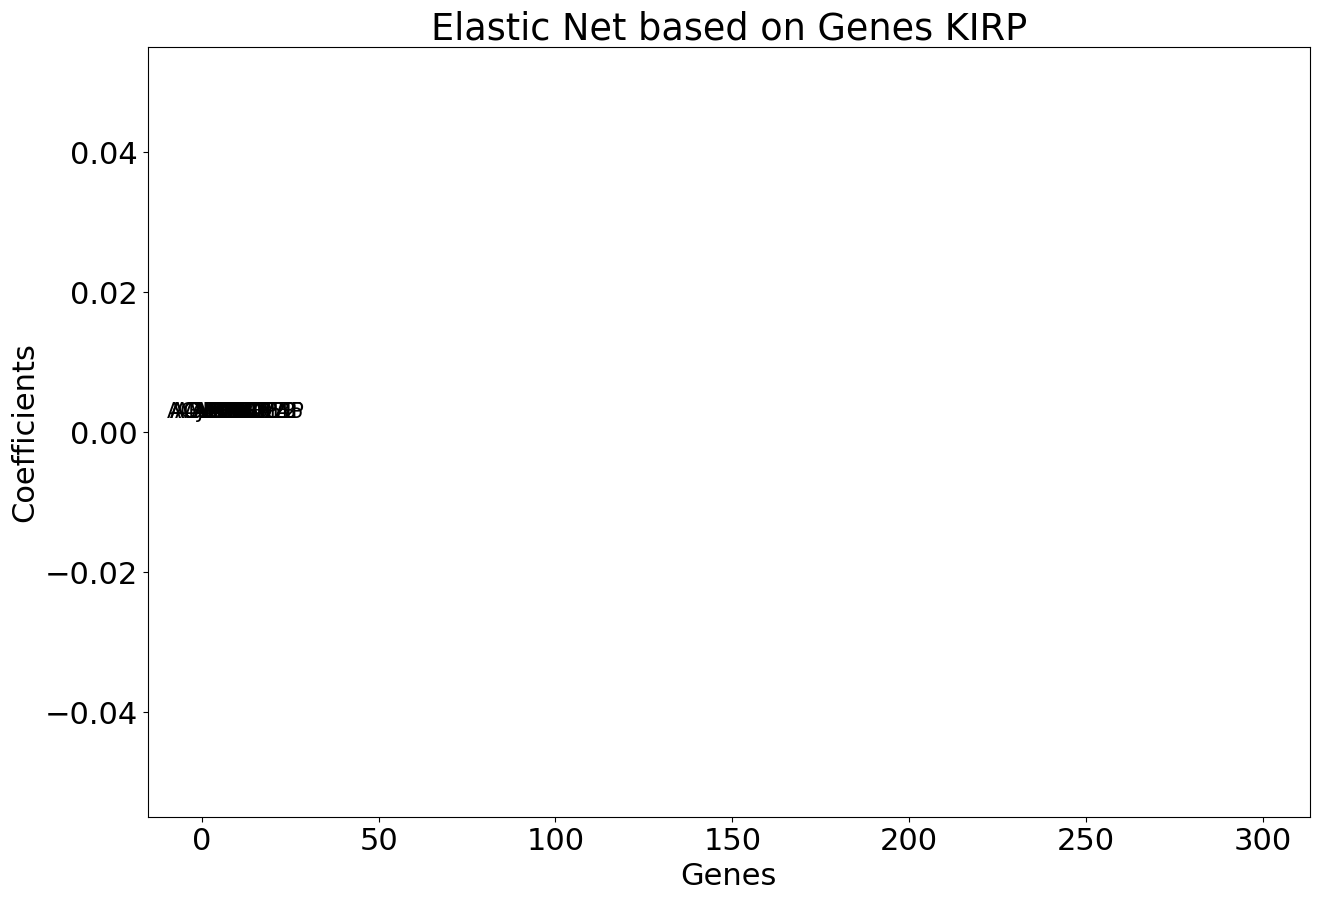

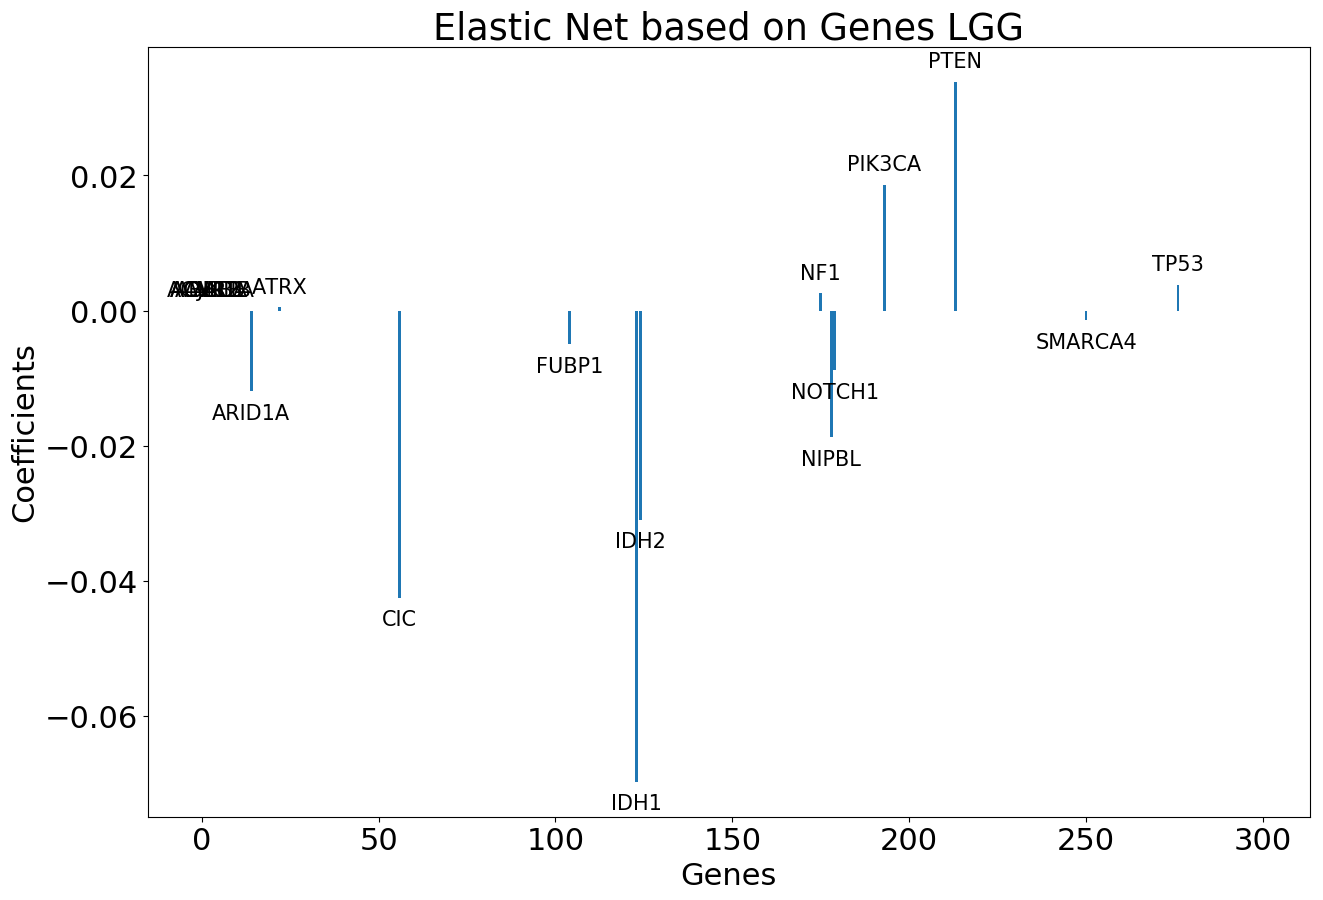

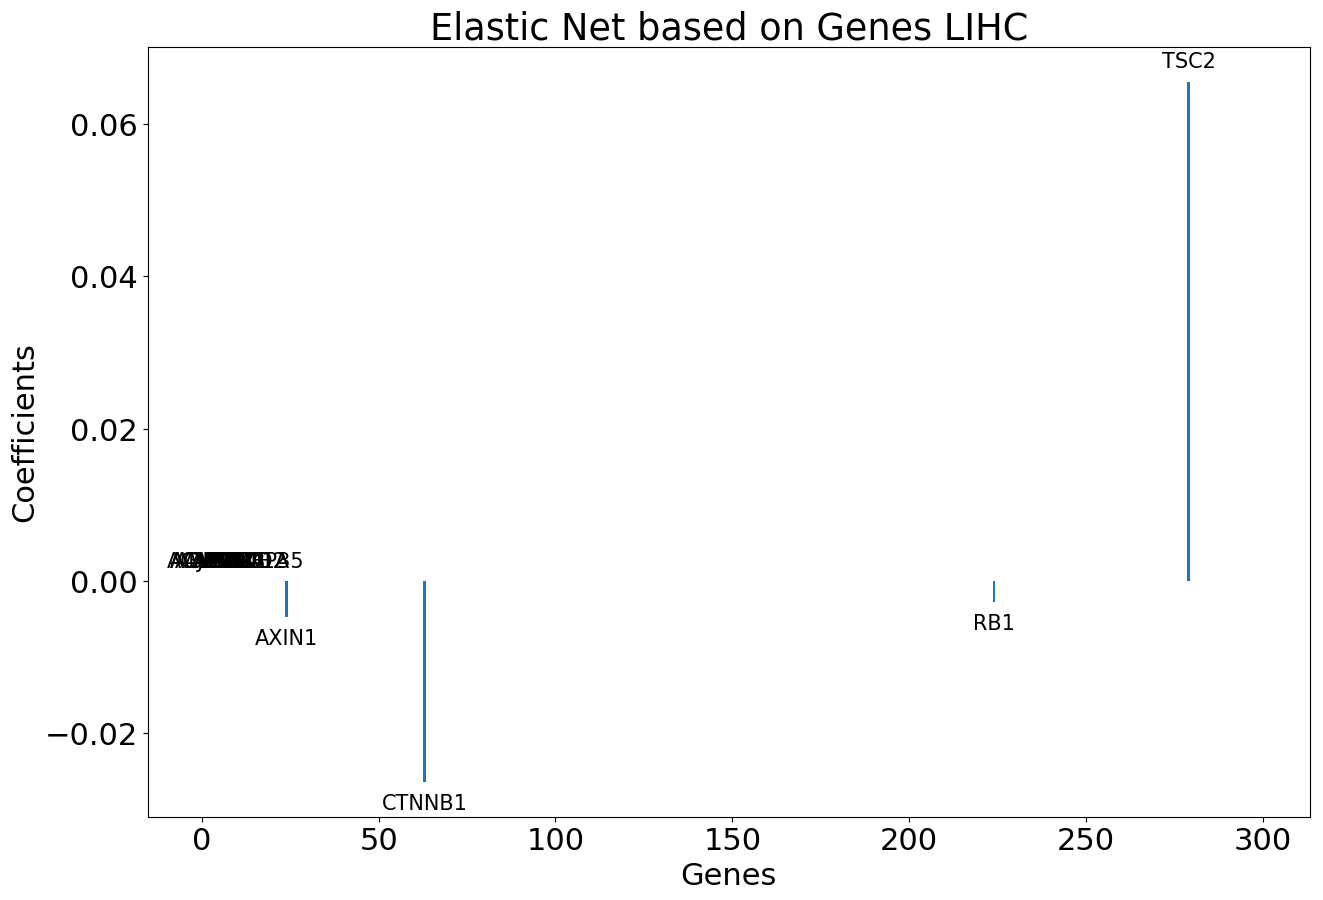

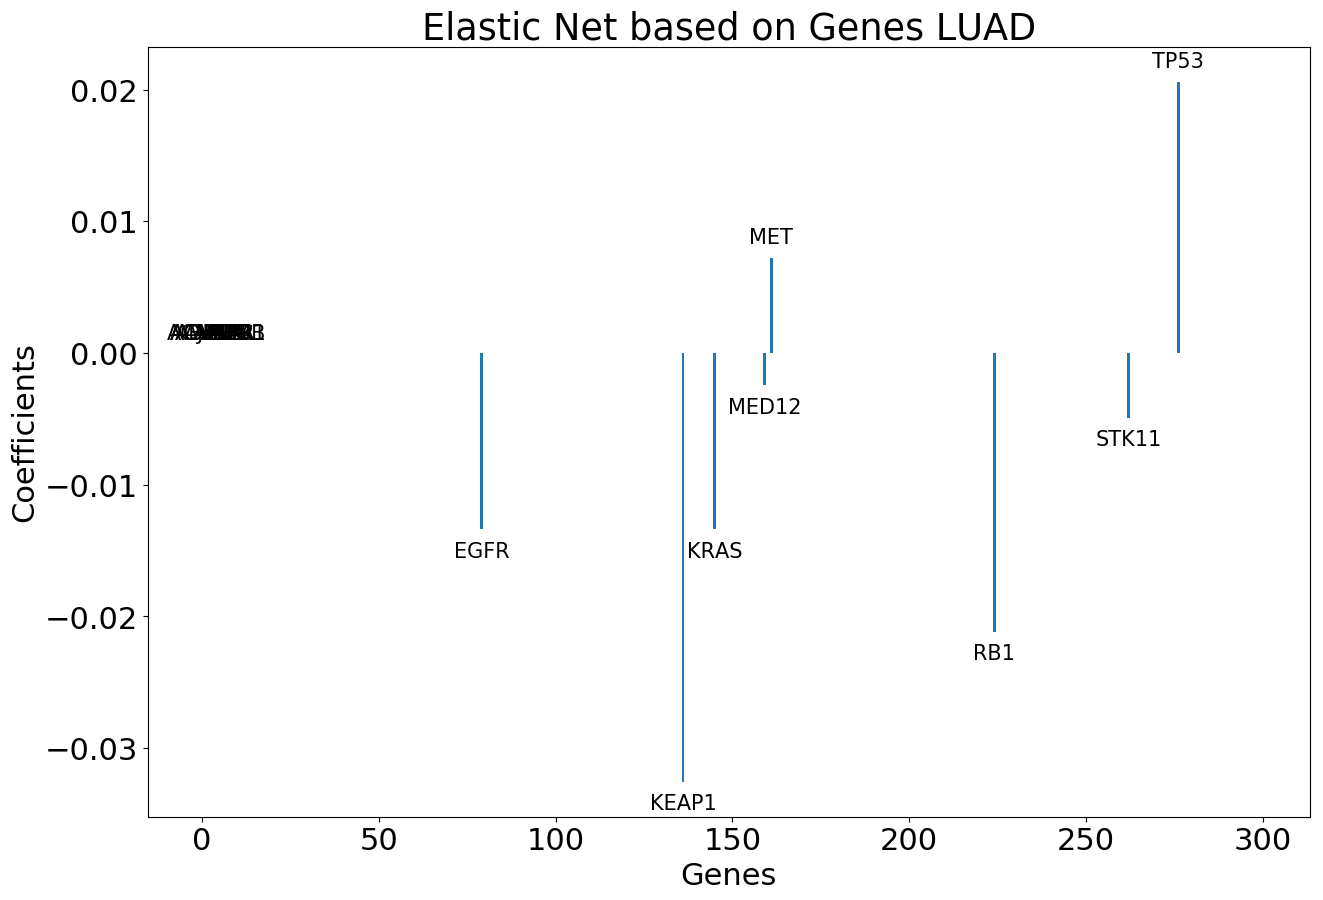

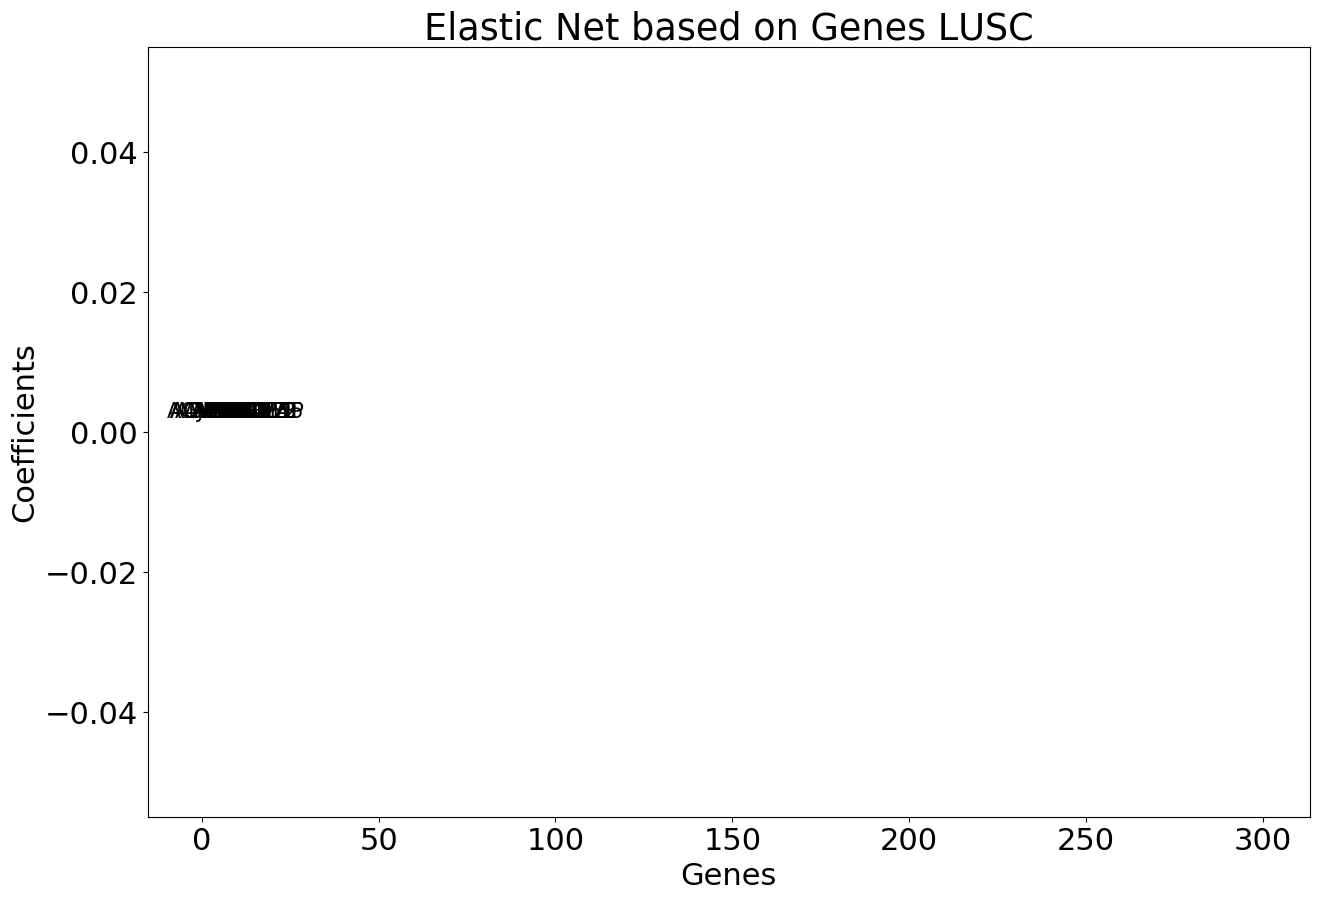

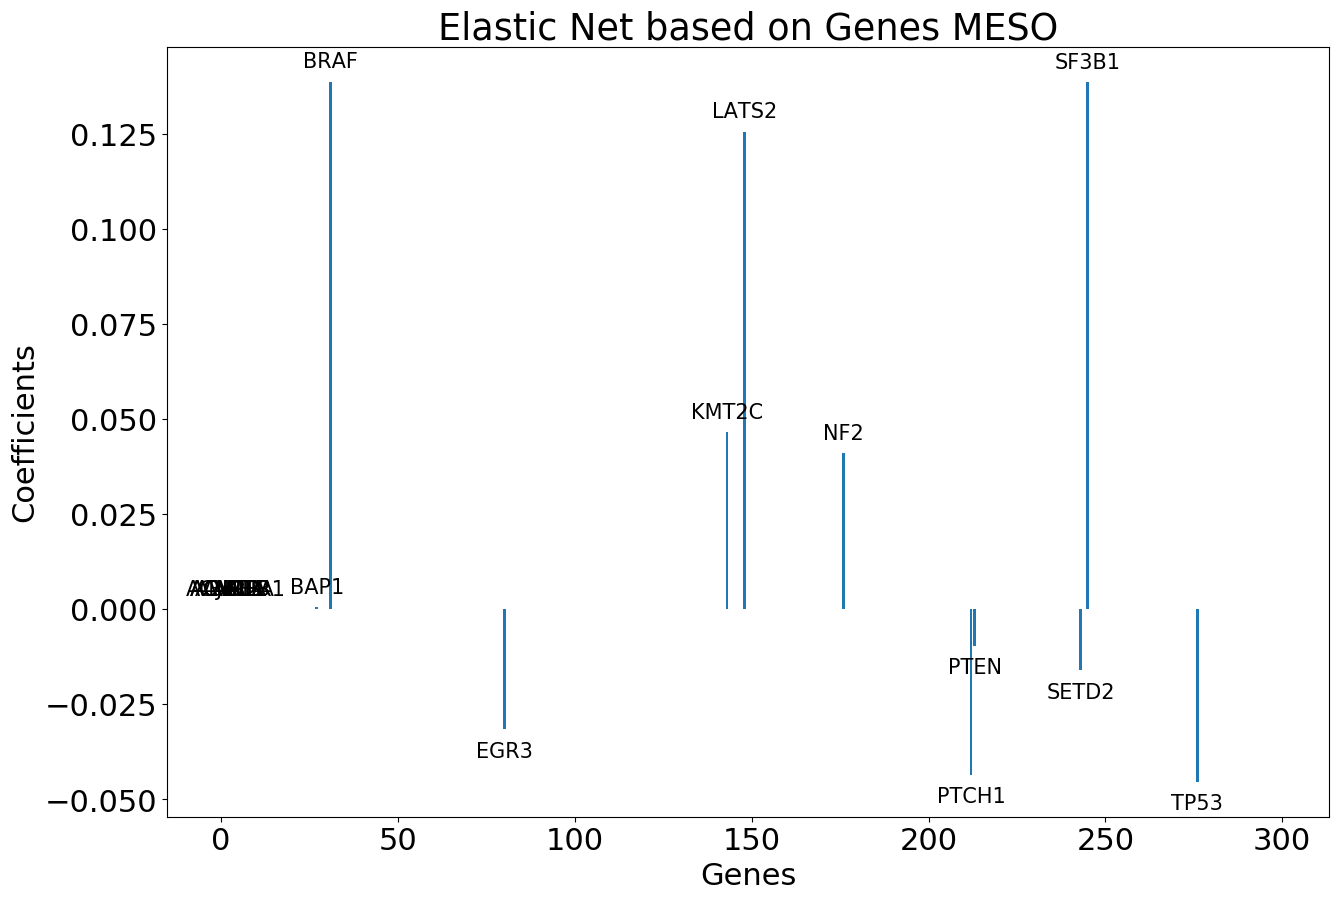

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


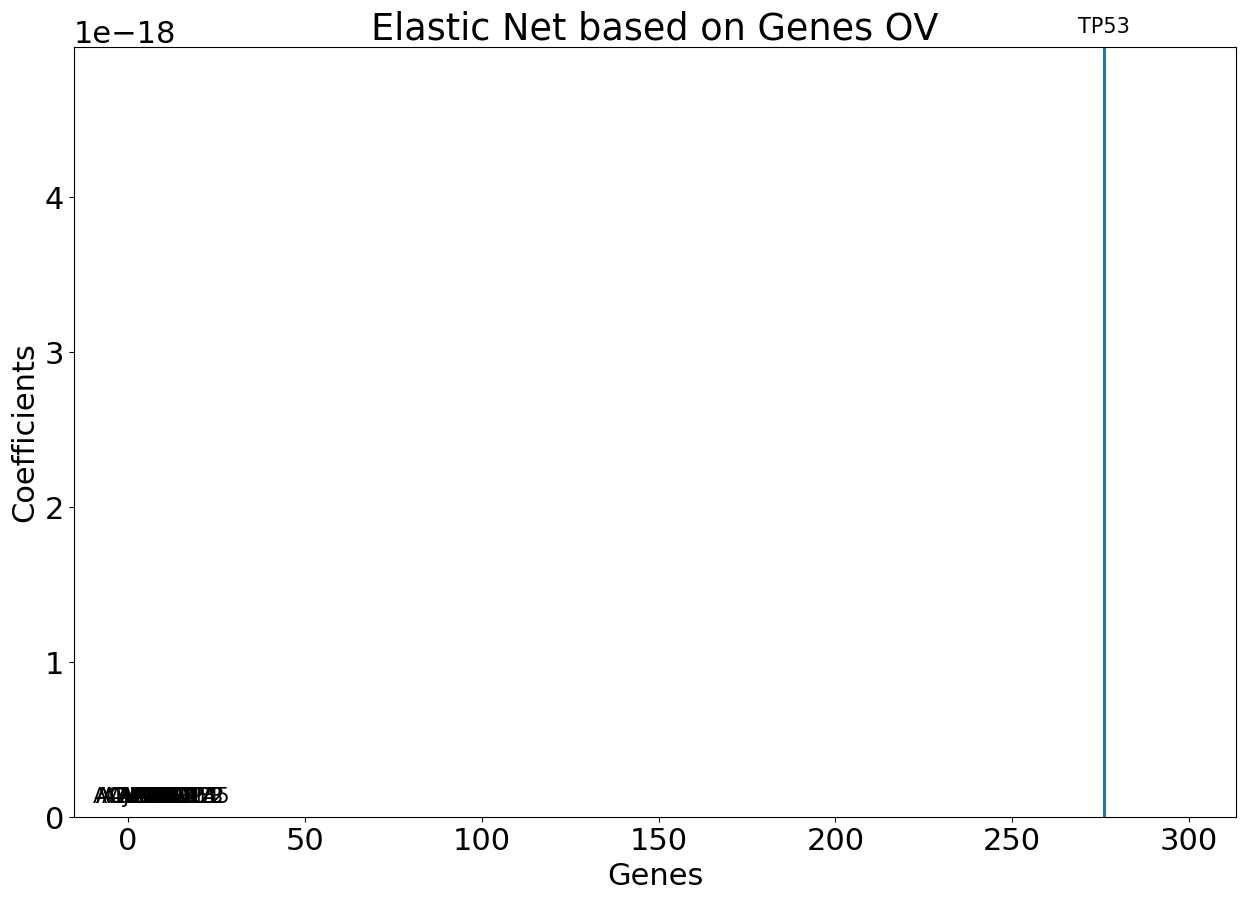

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


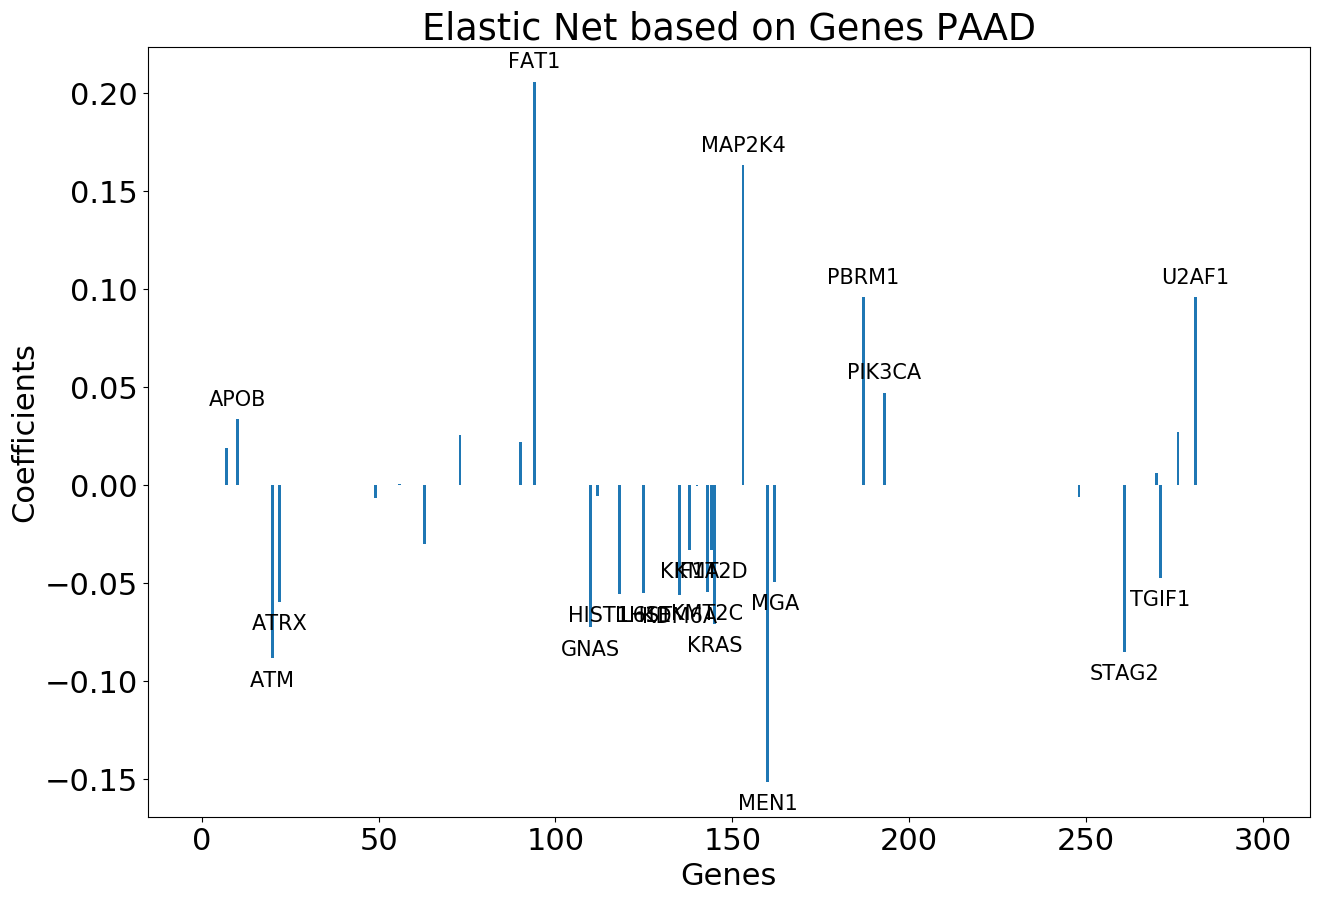

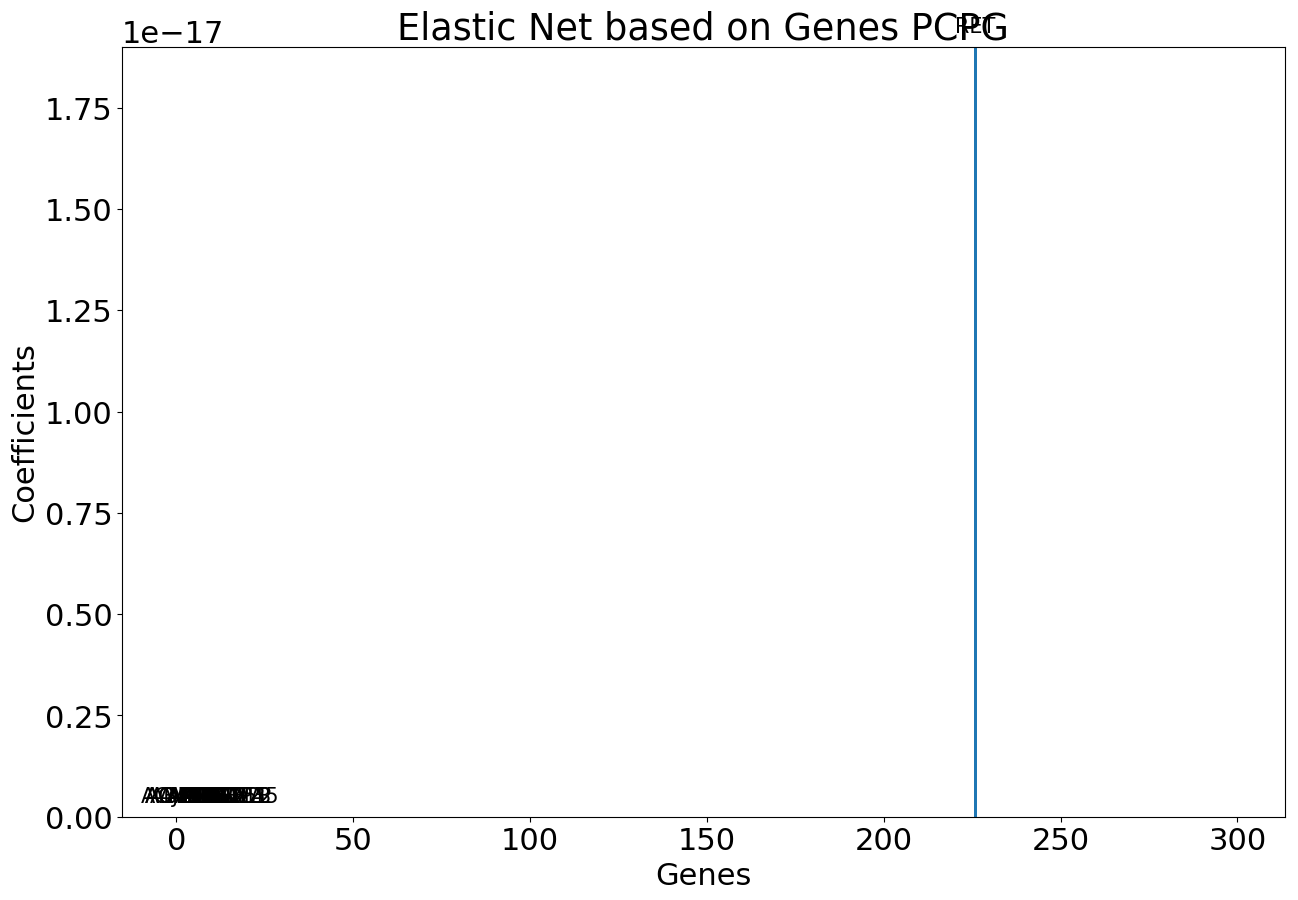

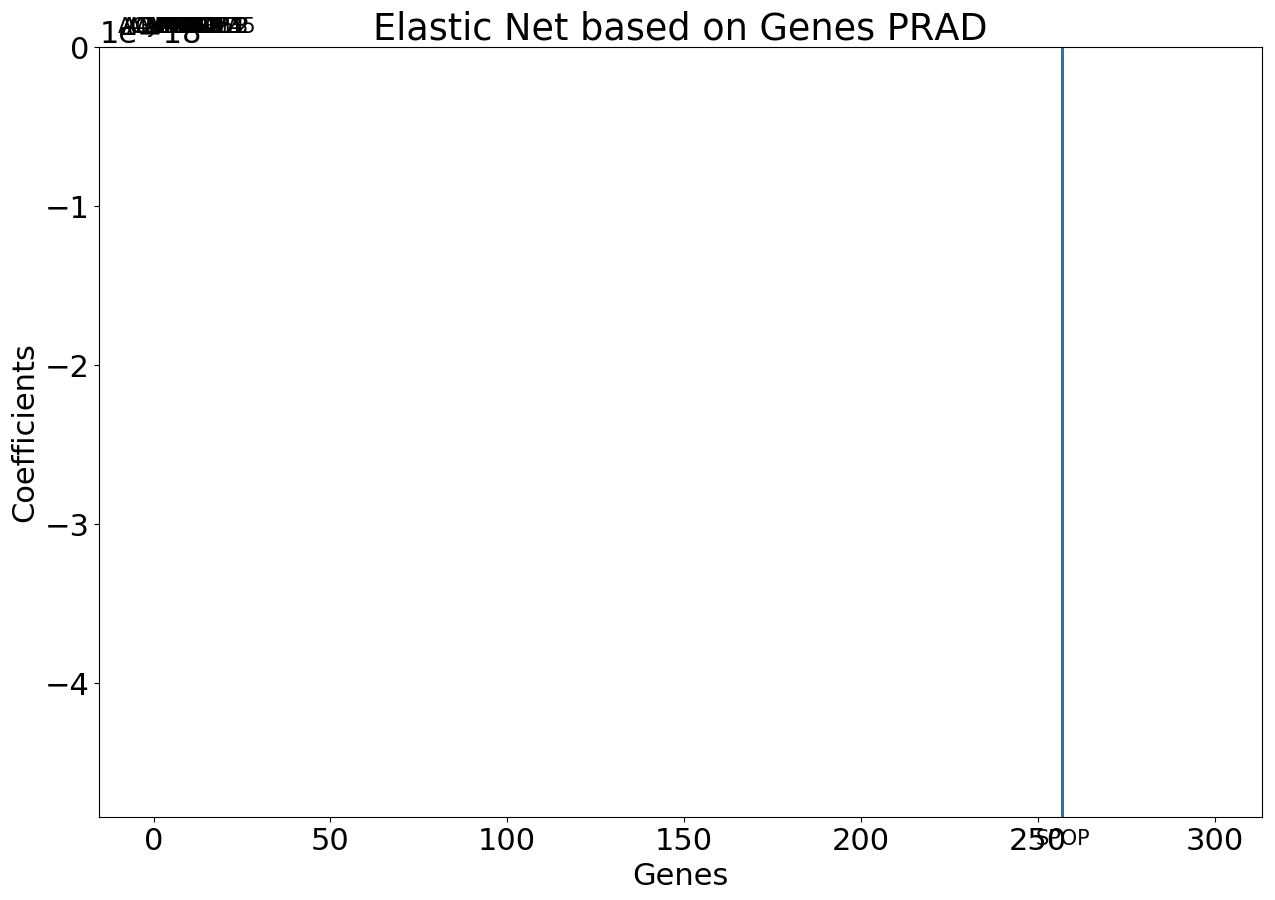

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


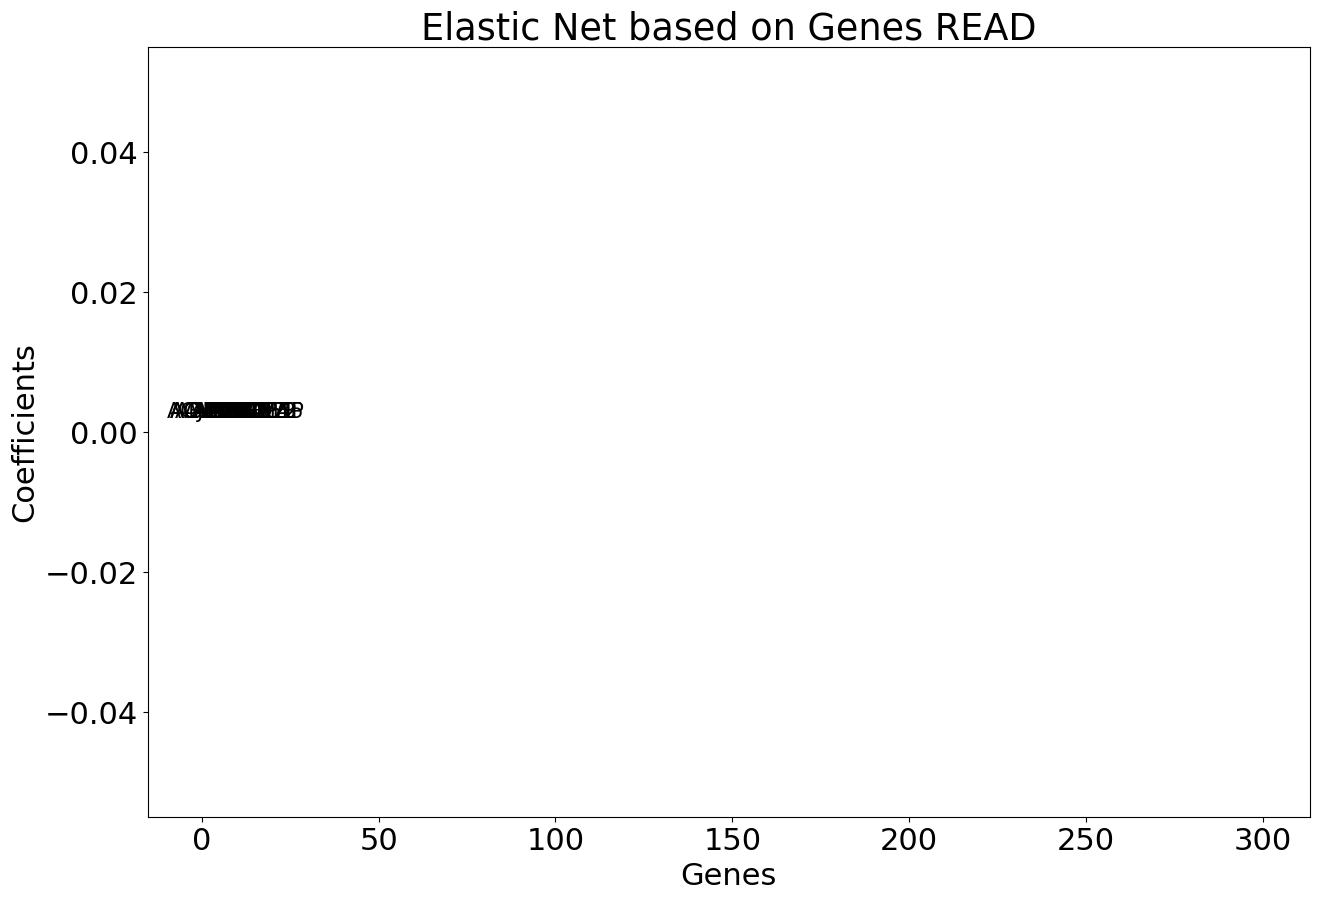

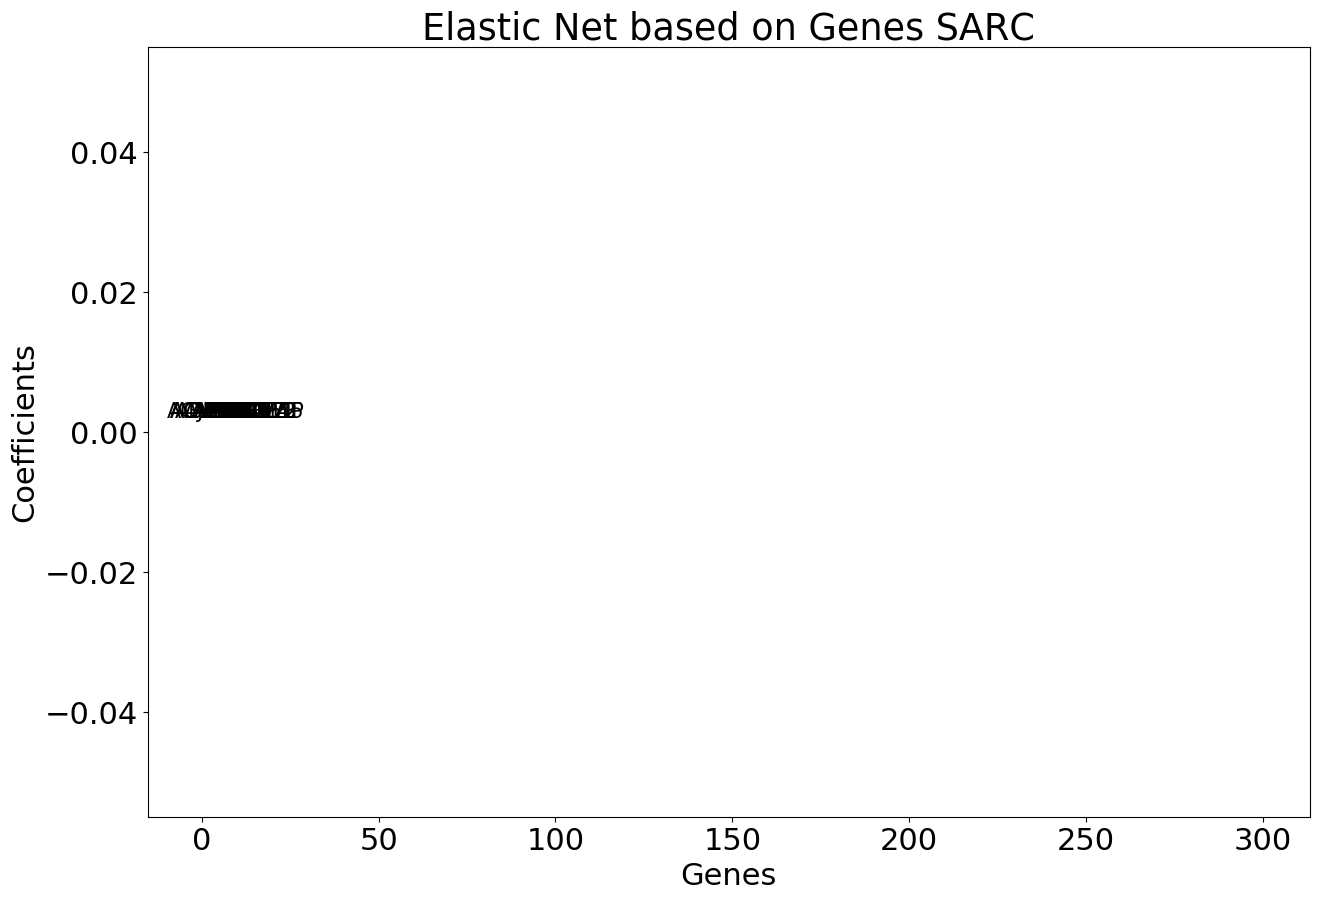

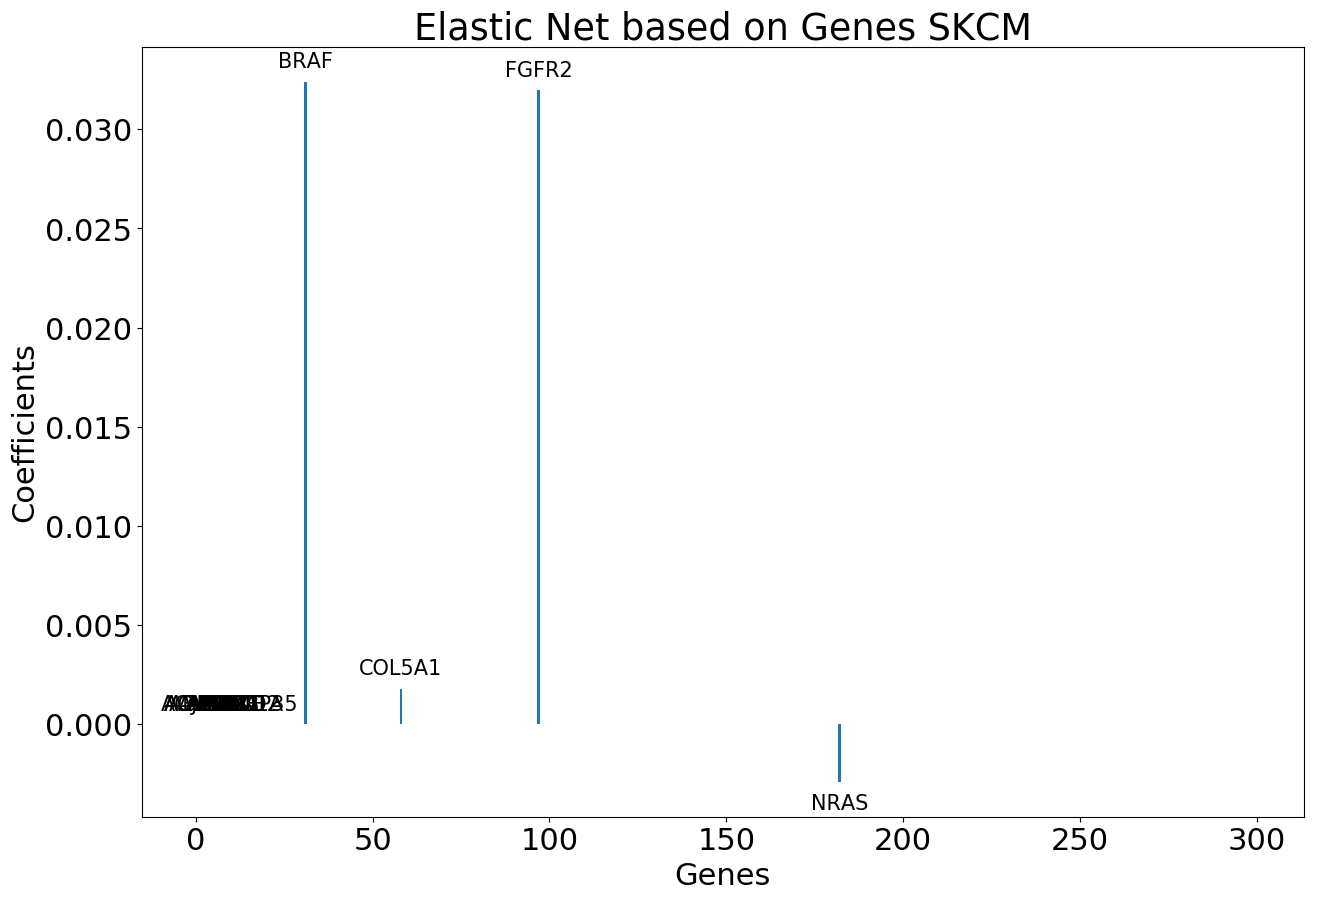

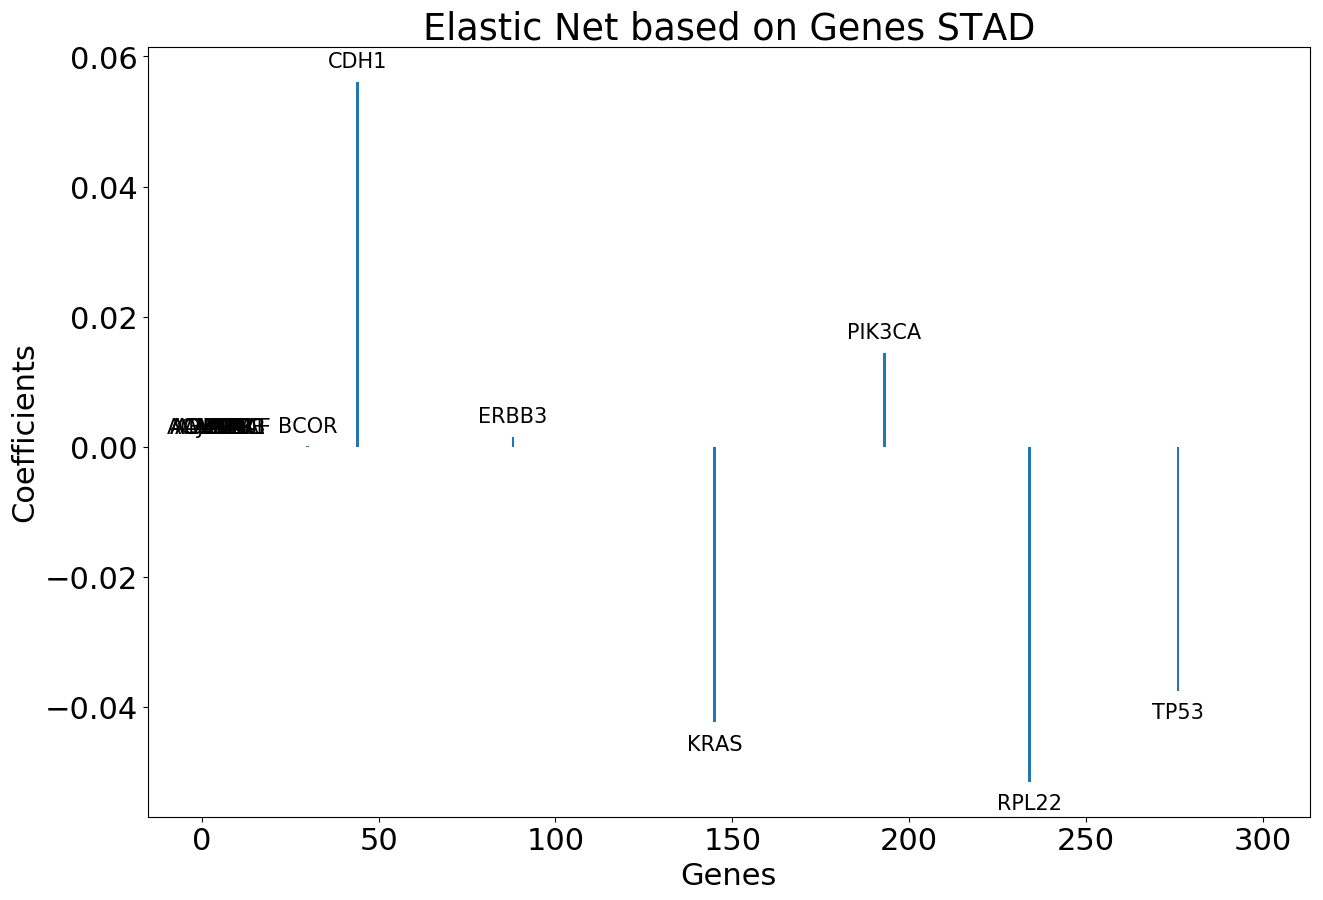

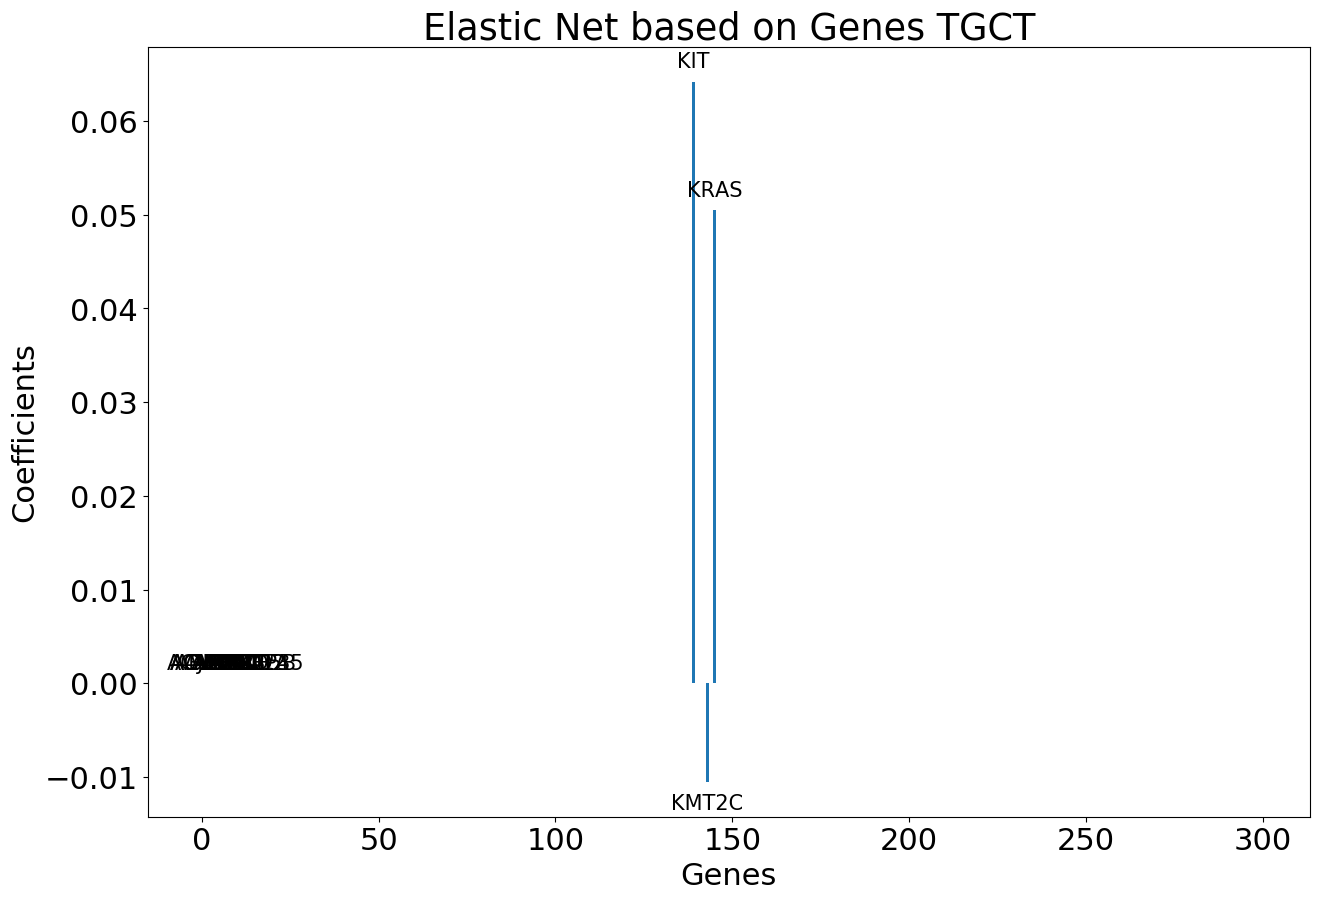

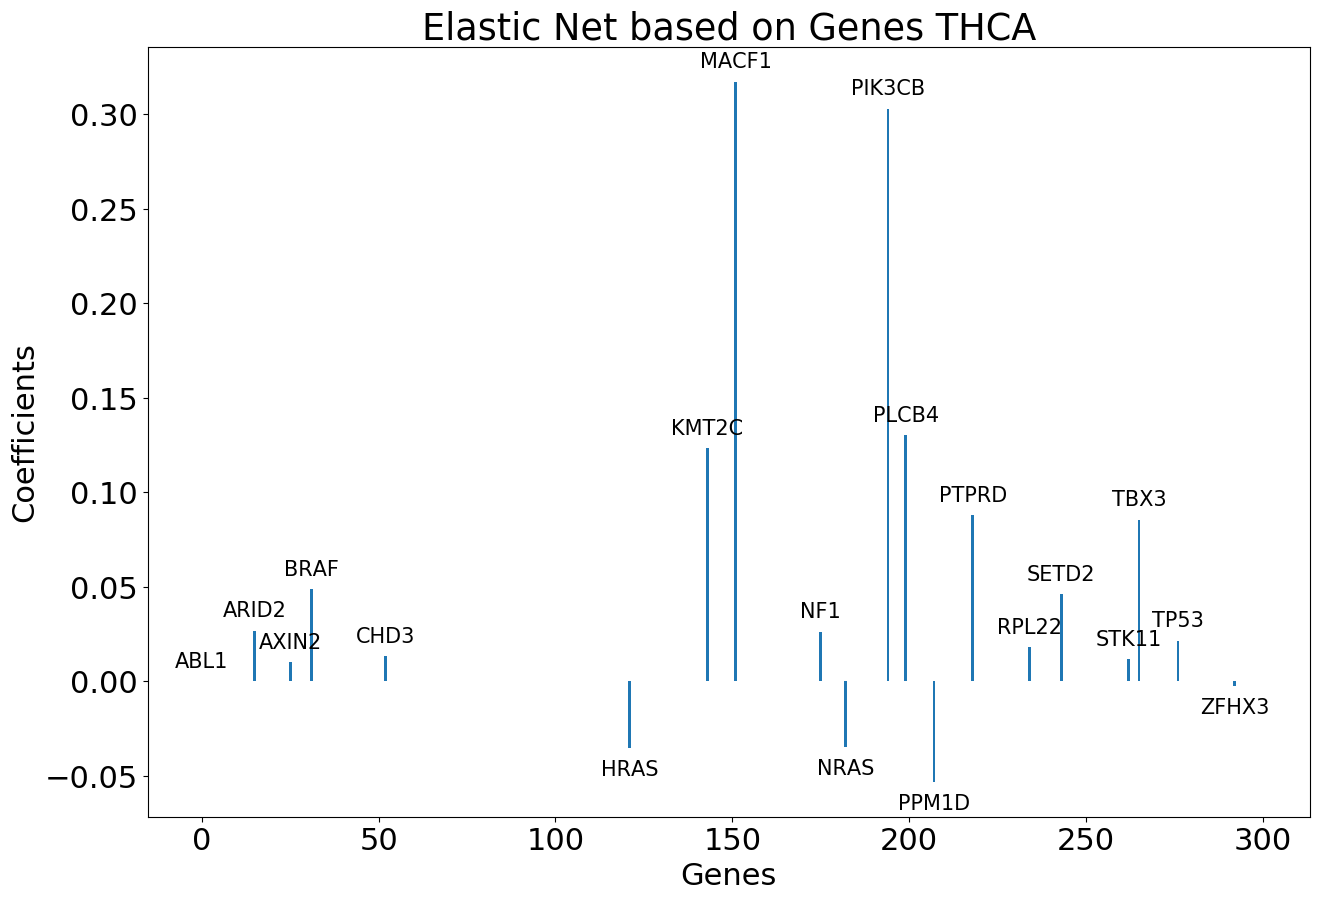

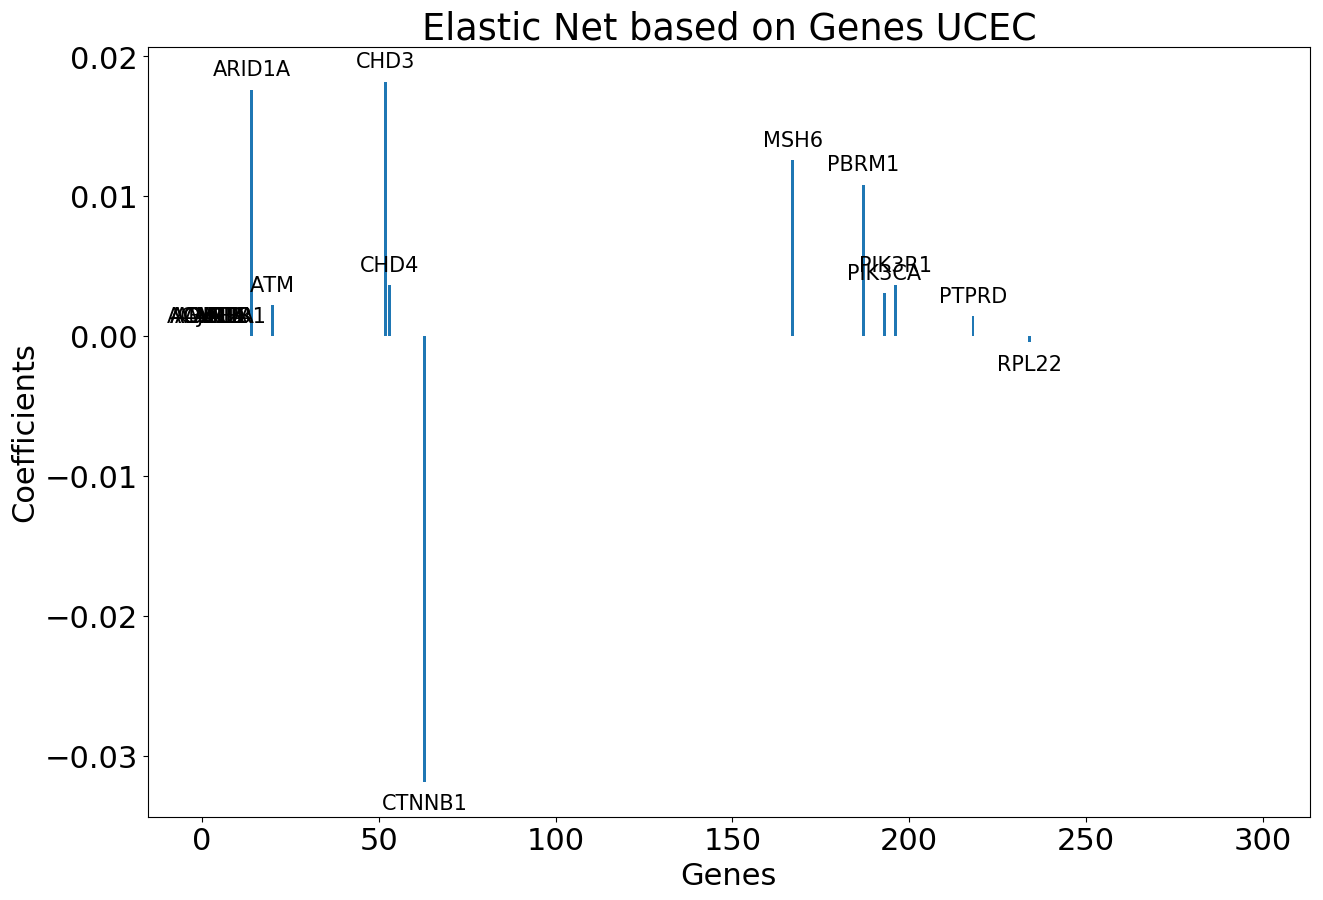

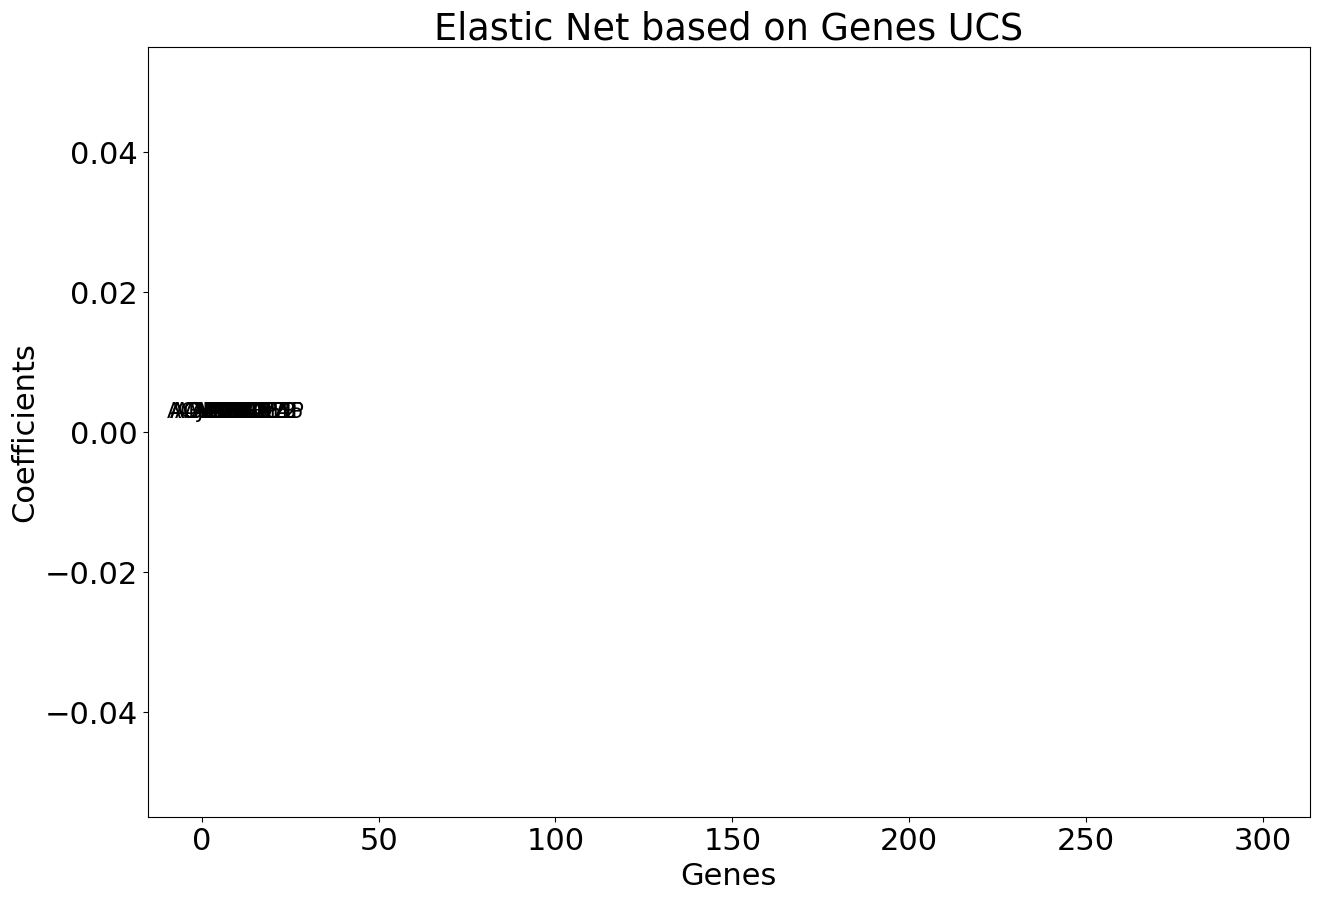

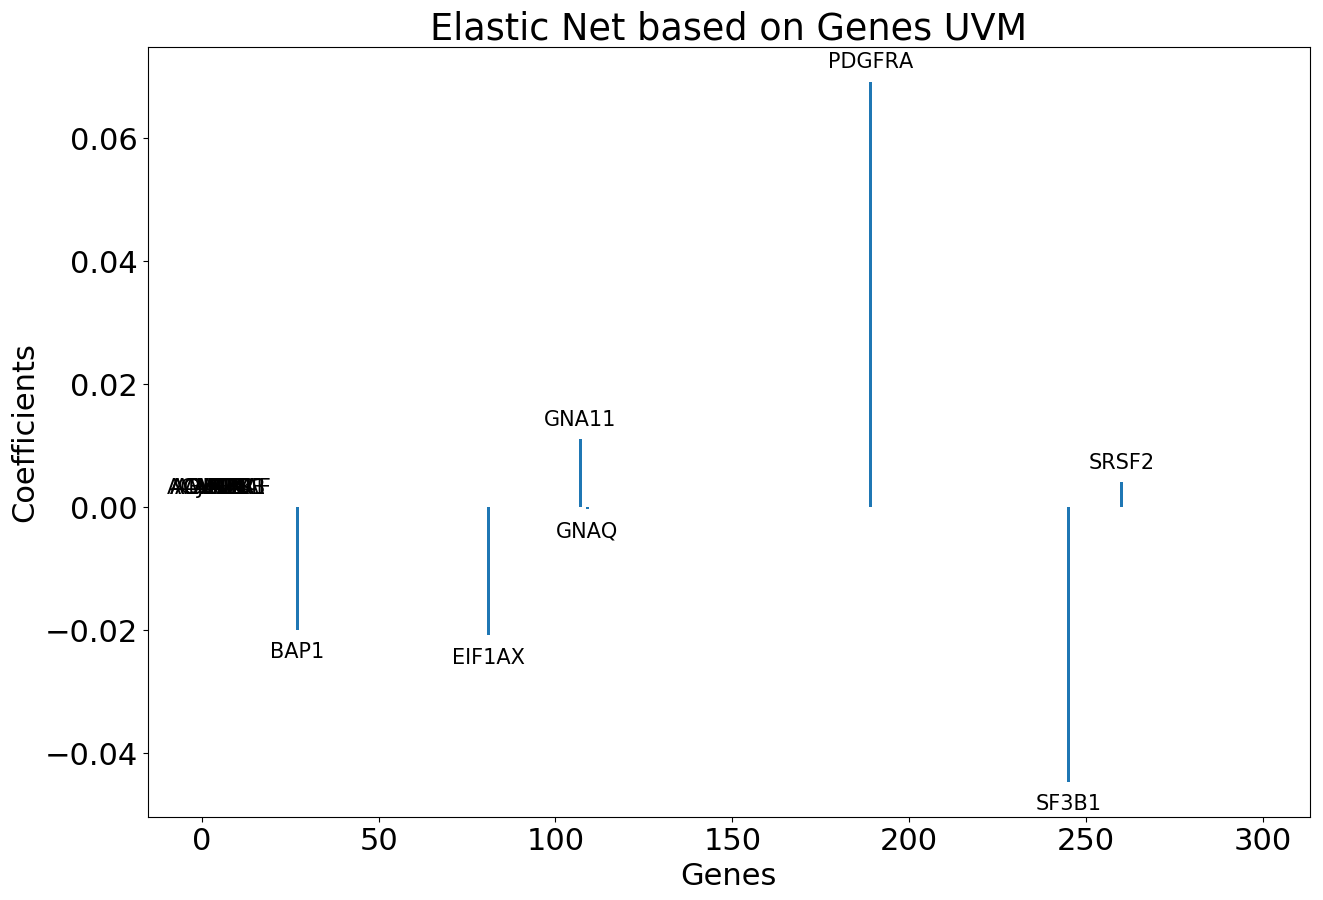

In [94]:
# run linear regression by different classes
font_size = 22
x_label = list(range(0,len(coef)))
num_features = 20
cancer_coeffs = []
for i in range(0, len(cancer_num_dist)):
    cancer_index = cancer_label_ind[i+1]
    name = cancer_name[i]
    enet_regr = ElasticNetCV(cv=5, random_state=0)
    enet_regr.fit([gene[j,:] for j in cancer_index], [lf[j] for j in cancer_index])
    ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

    cancer_coef = np.transpose(enet_regr.coef_)
    cancer_abs_coef = abs(cancer_coef)
    cancer_absSortlist = sorted(range(len(cancer_abs_coef)), key=lambda k: cancer_abs_coef[k],reverse = True)
    #print (len(cancer_coef))
    #print(name, end = ': ', flush=True)
    #print(i+1, end=': ', flush=True)    
    #for x in cancer_absSortlist[0:10]:
    #    print(x, end=' ', flush=True)
    #print('\n')
    #plot figures  
    
    plt.figure(figsize=(15, 10))
    plt.title(method + " based on Genes "+ name)
    plt.xlabel('Genes')
    plt.ylabel('Coefficients')
    #plt.yticks(2)
    plt.bar(x_label, cancer_coef)
    matplotlib.rcParams.update({'font.size': 22 })
    labels = gene_names[cancer_absSortlist[0:num_features],0]
    k = 0
    for x_loc,y_loc in zip([x_label[i] for i in cancer_absSortlist[0:num_features]], [cancer_coef[i] for i in cancer_absSortlist[0:num_features]]):
        label = labels[k]
        k = k+1
        if (y_loc<0):
            plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15)
        
        else:
            plt.annotate(label, # this is the text
                 (x_loc,y_loc), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize=15)
           
    plt.savefig("./out/"+method+"/"+cancer_name[i] + "_"+method+"_gene_lf.pdf", bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
    plt.show()
    